# ETL

In [224]:
import icu_data_defs
import mimic
from constants import column_names,variable_type,clinical_source

In [4]:
data_dict = icu_data_defs.data_dictionary('config/data_definitions.xlsx')
mimic_etlM = mimic.MimicETLManager('data/mimic_data_test.h5','config/mimic_item_map.csv',data_dict)

In [4]:
etl_info=mimic_etlM.etl(panel_id=12, overwrite=True, save_steps=True)

(2017-07-07 00:04:45) BEGIN ETL for 18 components: [u'heart rate', u'blood pressure systolic', u'blood pressure diastolic', u'blood pressure mean', u'respiratory rate', u'temperature body', u'oxygen saturation pulse oximetry', u'weight body', u'output urine', u'glasgow coma scale motor', u'glasgow coma scale eye opening', u'glasgow coma scale verbal', u'normal saline', u'lactated ringers', u'norepinephrine', u'vasopressin', u'hemoglobin', u'lactate']
(2017-07-07 00:04:45)>> HEART RATE: 1/18
(2017-07-07 00:04:45)>>>> Extract...
(2017-07-07 00:04:45)>>>>>> Extracting 5 items from chartevents
(2017-07-07 00:05:50)<<<<<< --- (65.0s)
(2017-07-07 00:05:50)>>>>>> Combine DF
(2017-07-07 00:05:50)<<<<<< --- (0.0s)
(2017-07-07 00:05:50)>>>>>> Clean UOM
(2017-07-07 00:06:10)<<<<<< --- (20.0s)
(2017-07-07 00:06:10)<<<< --- (85.0s)
(2017-07-07 00:06:10)>>>> Transform...
(2017-07-07 00:07:57)<<<< --- (107.0s)
(2017-07-07 00:07:57)>>>> Clean...
(2017-07-07 00:08:48)>>>>>> Nominal to OneHot
(2017-07-0

In [46]:
etl_info

stat                         component  EXTRACTED_id_count  \
0                           heart rate               56716   
1              blood pressure systolic               56680   
2             blood pressure diastolic               56677   
3                  blood pressure mean               21921   
4                     respiratory rate               56673   
5                     temperature body               48916   
6     oxygen saturation pulse oximetry               49011   
7                          weight body               31866   
8                         output urine               52344   
9             glasgow coma scale motor               27184   
10      glasgow coma scale eye opening               27190   
11           glasgow coma scale verbal               27188   
12                       normal saline               19770   
13                    lactated ringers               16593   
14                      norepinephrine                7358   
15                         vasopressin                2349   
16                          hemoglobin               57036   
17                             lactate               34319   

stat  EXTRACTED_data_count  TRANSFORMED_id_count  TRANSFORMED_data_count  \
0                  7952939                 56545                 7923873   
1                  6374824                 56506                 6331588   
2                  6371282                 56507                 6346872   
3                  2536271                 21921                 2536271   
4                  7810019                 56501                 7781312   
5                  1751447                 48760                 1734835   
6                  6099827                 48848                 6073693   
7                    95425                 31708                   94484   
8                  3633605                 52252                 3628884   
9                   952565                 27183                  949241   
10                  956672                 27189                  953638   
11                  954700                 27186                  950956   
12                  771272                 19767                  771272   
13                  269864                 16579                  269655   
14                  632673                  7341                  631779   
15                  172851                  2342                  172253   
16                 1167921                 57030                  985037   
17                  393608                 34287                  382411   

stat  CLEANED_id_count  CLEANED_data_count  
0                56545             7923135  
1                56506             6331002  
2                56507             6346070  
3                21921             2534398  
4                56501             7780557  
5                48760             1734221  
6                48848             6073120  
7                31708               94446  
8                52252             3627083  
9                27183              949198  
10               27189              953595  
11               27186              950913  
12               19767              505941  
13               16579              255324  
14                7341              569450  
15                2342              169229  
16               57030              985006  
17               34287              382347

In [47]:
etl_info['data_loss'] = (etl_info['EXTRACTED_data_count'] - etl_info['CLEANED_data_count'])
etl_info['id_loss'] = (etl_info['EXTRACTED_id_count'] - etl_info['CLEANED_id_count'])

In [48]:
etl_info['%data_loss'] = (etl_info['data_loss']/etl_info['EXTRACTED_data_count']).sort_values().apply(lambda x: str(np.round(x*100,3))+'%')
etl_info['%id_loss'] = (etl_info['id_loss']/etl_info['EXTRACTED_id_count']).sort_values().apply(lambda x: str(np.round(x*100,3))+'%')

In [49]:
etl_info.sort_values('%id_loss')

stat                         component  EXTRACTED_id_count  \
3                  blood pressure mean               21921   
10      glasgow coma scale eye opening               27190   
9             glasgow coma scale motor               27184   
11           glasgow coma scale verbal               27188   
16                          hemoglobin               57036   
12                       normal saline               19770   
13                    lactated ringers               16593   
17                             lactate               34319   
8                         output urine               52344   
14                      norepinephrine                7358   
15                         vasopressin                2349   
2             blood pressure diastolic               56677   
0                           heart rate               56716   
4                     respiratory rate               56673   
1              blood pressure systolic               56680   
5                     temperature body               48916   
6     oxygen saturation pulse oximetry               49011   
7                          weight body               31866   

stat  EXTRACTED_data_count  TRANSFORMED_id_count  TRANSFORMED_data_count  \
3                  2536271                 21921                 2536271   
10                  956672                 27189                  953638   
9                   952565                 27183                  949241   
11                  954700                 27186                  950956   
16                 1167921                 57030                  985037   
12                  771272                 19767                  771272   
13                  269864                 16579                  269655   
17                  393608                 34287                  382411   
8                  3633605                 52252                 3628884   
14                  632673                  7341                  631779   
15                  172851                  2342                  172253   
2                  6371282                 56507                 6346872   
0                  7952939                 56545                 7923873   
4                  7810019                 56501                 7781312   
1                  6374824                 56506                 6331588   
5                  1751447                 48760                 1734835   
6                  6099827                 48848                 6073693   
7                    95425                 31708                   94484   

stat  CLEANED_id_count  CLEANED_data_count  data_loss  id_loss %data_loss  \
3                21921             2534398       1873        0     0.074%   
10               27189              953595       3077        1     0.322%   
9                27183              949198       3367        1     0.353%   
11               27186              950913       3787        2     0.397%   
16               57030              985006     182915        6    15.662%   
12               19767              505941     265331        3    34.402%   
13               16579              255324      14540       14     5.388%   
17               34287              382347      11261       32     2.861%   
8                52252             3627083       6522       92     0.179%   
14                7341              569450      63223       17     9.993%   
15                2342              169229       3622        7     2.095%   
2                56507             6346070      25212      170     0.396%   
0                56545             7923135      29804      171     0.375%   
4                56501             7780557      29462      172     0.377%   
1                56506             6331002      43822      174     0.687%   
5                48760             1734221      17226      156     0.984%   
6                48848             6073120      26707      163     

In [52]:
data_count = etl_info.set_index('component')['CLEANED_data_count']
data_count.sort_values(ascending=False)/data_count.max()

component
heart rate                          1.000000
respiratory rate                    0.982005
blood pressure diastolic            0.800954
blood pressure systolic             0.799053
oxygen saturation pulse oximetry    0.766505
output urine                        0.457784
blood pressure mean                 0.319873
temperature body                    0.218881
hemoglobin                          0.124320
glasgow coma scale eye opening      0.120356
glasgow coma scale verbal           0.120017
glasgow coma scale motor            0.119801
norepinephrine                      0.071872
normal saline                       0.063856
lactate                             0.048257
lactated ringers                    0.032225
vasopressin                         0.021359
weight body                         0.011920
Name: CLEANED_data_count, dtype: float64

In [58]:
etl_info.component = etl_info.component.astype(str)
etl_info.to_hdf('data/mimic_data_test.h5','etl_info',format='t', data_columns=[column_names.COMPONENT])

# Test/VALIDATE/Train split

In [228]:
from sklearn.model_selection import train_test_split
import mimic

In [229]:
random_state=42

all_ids = mimic.get_all_hadm_ids()

#these test IDs will never be touched again. They are sacred
train_ids,test_ids = train_test_split(all_ids,test_size=0.1,random_state=random_state)
train_ids,validate_ids = train_test_split(train_ids,test_size=(1.0/9.0),random_state=random_state)

print 'Train (80%):', len(train_ids),'>',train_ids[:5],'...'
print 'Validate (10%):', len(validate_ids),'>',validate_ids[:5],'...'
print 'Test (10%):', len(test_ids),'>',test_ids[:5],'...'

Train (80%): 47180 > [139698, 127590, 178959, 139276, 196600] ...
Validate (10%): 5898 > [112338, 107467, 158733, 144544, 115417] ...
Test (10%): 5898 > [167957, 164747, 124147, 184424, 136508] ...


# Models and Stuff

In [227]:
#my stuff
import icu_data_defs
import transformers
import utils
import features
from constants import column_names,variable_type,clinical_source
import units

#other stuff
from sklearn.linear_model import LinearRegression,ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

#make pretty pictures
import seaborn as sns
%matplotlib inline

In [4]:
"""
Pre-processors for each df
"""
hdf5_fname = 'data/mimic_extract.h5'
data_dict = icu_data_defs.data_dictionary('config/data_definitions.xlsx')
mimic_etlM = mimic.MimicETLManager(hdf5_fname,'config/mimic_item_map.csv',data_dict)

factory = features.DataSetFactory(features=None,
                                  resample_freq=None,
                                  data_dict=data_dict,
                                  ETL_manager=mimic_etlM,
                                  hdf5_fname_target=None
                                 )

In [5]:
factory.get_params()

{'ETL_manager': <mimic.MimicETLManager at 0xd766908>,
 'data_dict': <icu_data_defs.data_dictionary at 0xd7668d0>,
 'features': None,
 'force_preprocessing': True,
 'hdf5_fname_target': None,
 'pre_processors': do_nothing(),
 'resample_freq': None,
 'save_ETL_steps': False}

In [6]:
"""
Some features
"""

#LACTATE (for labels)
component = data_dict.components.LACTATE
label = features.Feature('LABEL',{column_names.COMPONENT:component},'mean')
lac_mean = features.SimpleFeature('mean',component,
                                           pre_processor=transformers.GroubyAndFFill(level=column_names.ID),
                                           fillna_method=transformers.fill_mean())
lac_most_recent = features.SimpleFeature('last',component,
                                           fillna_method=Pipeline([
                                                        ('ffill',transformers.GroubyAndFFill(level=column_names.ID)),
                                                        ('fill_mean',transformers.fill_mean())
                                                    ]))
lac_count = features.SimpleFeature('count',component,
                                           fillna_method=transformers.fill_zero())

## Lactate -> Next Lactate

### Regression without CrossValidation

In [9]:
factory.resample_freq='2H'
factory.hdf5_fname_target = 'data/qn_combine_all.h5'
factory.pre_processors = Pipeline([
                                ('drop_small_columns',transformers.remove_small_columns(threshold=50)),
                                ('drop_low_id_count',transformers.record_threshold(threshold=20)),
                                ('quantitative only',transformers.filter_var_type([variable_type.QUANTITATIVE])),
                                ('combine_like_columns',transformers.combine_like_cols())
                            ])

factory.features = [lac_mean,lac_most_recent,lac_count,label]

In [10]:
factory.get_params()

{'ETL_manager': <mimic.MimicETLManager at 0xd766908>,
 'data_dict': <icu_data_defs.data_dictionary at 0xd7668d0>,
 'features': [<features.SimpleFeature at 0xe248550>,
 'force_preprocessing': True,
 'hdf5_fname_target': 'data/qn_combine_all.h5',
 'pre_processors': Pipeline(steps=[('drop_small_columns', remove_small_columns(threshold=50)), ('drop_low_id_count', record_threshold(threshold=20)), ('quantitative only', filter_var_type(var_types=['qn'])), ('combine_like_columns', combine_like_cols())]),
 'pre_processors__combine_like_columns': combine_like_cols(),
 'pre_processors__drop_low_id_count': record_threshold(threshold=20),
 'pre_processors__drop_low_id_count__threshold': 20,
 'pre_processors__drop_small_columns': remove_small_columns(threshold=50),
 'pre_processors__drop_small_columns__threshold': 50,
 'pre_processors__quantitative only': filter_var_type(var_types=['qn']),
 'pre_processors__quantitative only__var_types': ['qn'],
 'pre_processors__steps': [('drop_small_columns',
   r

In [6]:
df_lactate_train = factory.fit_transform(train_ids)

(2017-07-12 19:56:04) FEATURIZE... #F=4, #ids=47180, fit->True
(2017-07-12 19:56:04)>> PRE-PROCESSING & JOIN: #C=1, [u'lactate']
(2017-07-12 19:56:05)>>>> lactate - 1/1
(2017-07-12 19:56:05)>>>>>> READ DF...
(2017-07-12 19:56:07)<<<<<< --- (2.0s)
(2017-07-12 19:56:07)>>>>>> PREPROCESS...
(2017-07-12 19:56:07)<<<<<< --- (0.0s)
(2017-07-12 19:56:07)>>>>>> *fit* Filter columns (remove_small_columns) (142289, 63)
(2017-07-12 19:56:07)<<<<<< --- (0.0s)
(2017-07-12 19:56:07)>>>>>> *transform* Filter columns (remove_small_columns) (142289, 63)
(2017-07-12 19:56:07)<<<<<< --- (0.0s)
(2017-07-12 19:56:07)>>>>>> *fit* Filter columns (record_threshold) (142289, 4)
(2017-07-12 19:56:07)<<<<<< --- (0.0s)
(2017-07-12 19:56:07)>>>>>> *transform* Filter columns (record_threshold) (142289, 4)
(2017-07-12 19:56:07)<<<<<< --- (0.0s)
(2017-07-12 19:56:07)>>>>>> *fit* Filter columns (filter_var_type) (142289, 4)
(2017-07-12 19:56:07)<<<<<< --- (0.0s)
(2017-07-12 19:56:07)>>>>>> *transform* Filter columns (

In [7]:
df_lactate_validate = factory.transform(validate_ids)

(2017-07-12 20:00:59) FEATURIZE... #F=4, #ids=5898, fit->False
(2017-07-12 20:00:59)>> PRE-PROCESSING & JOIN: #C=1, [u'lactate']
(2017-07-12 20:00:59)>>>> lactate - 1/1
(2017-07-12 20:00:59)>>>>>> READ DF...
(2017-07-12 20:01:00)<<<<<< --- (1.0s)
(2017-07-12 20:01:00)>>>>>> PREPROCESS...
(2017-07-12 20:01:00)<<<<<< --- (0.0s)
(2017-07-12 20:01:00)>>>>>> *transform* Filter columns (remove_small_columns) (18340, 63)
(2017-07-12 20:01:00)<<<<<< --- (0.0s)
(2017-07-12 20:01:00)>>>>>> *transform* Filter columns (record_threshold) (18340, 4)
(2017-07-12 20:01:00)<<<<<< --- (0.0s)
(2017-07-12 20:01:00)>>>>>> *transform* Filter columns (filter_var_type) (18340, 4)
(2017-07-12 20:01:00)<<<<<< --- (0.0s)
(2017-07-12 20:01:00)>>>>>> TRANSFORM Combine like columns (18340, 4)
(2017-07-12 20:01:00)>>>>>>>> ('lactate', 'known', 'qn', 'mmol/L')
(2017-07-12 20:01:00)<<<<<<<< --- (0.0s)
(2017-07-12 20:01:00)<<<<<< --- (0.0s)
(2017-07-12 20:01:00)>>>>>> SAVE DF... (18336, 1) -> simple_processing/39009739

In [8]:
y_train = df_lactate_train.loc[:,['LABEL']].shift(-1).dropna().iloc[:,0]
y_validate = df_lactate_validate.loc[:,['LABEL']].shift(-1).dropna().iloc[:,0]

X_train = df_lactate_train.drop('LABEL',axis=1).loc[y_train.index]
X_validate = df_lactate_validate.drop('LABEL',axis=1).loc[y_validate.index]

In [11]:
print X_train.shape,y_train.shape
print X_validate.shape,y_validate.shape

(131099, 3) (131099L,)
(16937, 3) (16937L,)


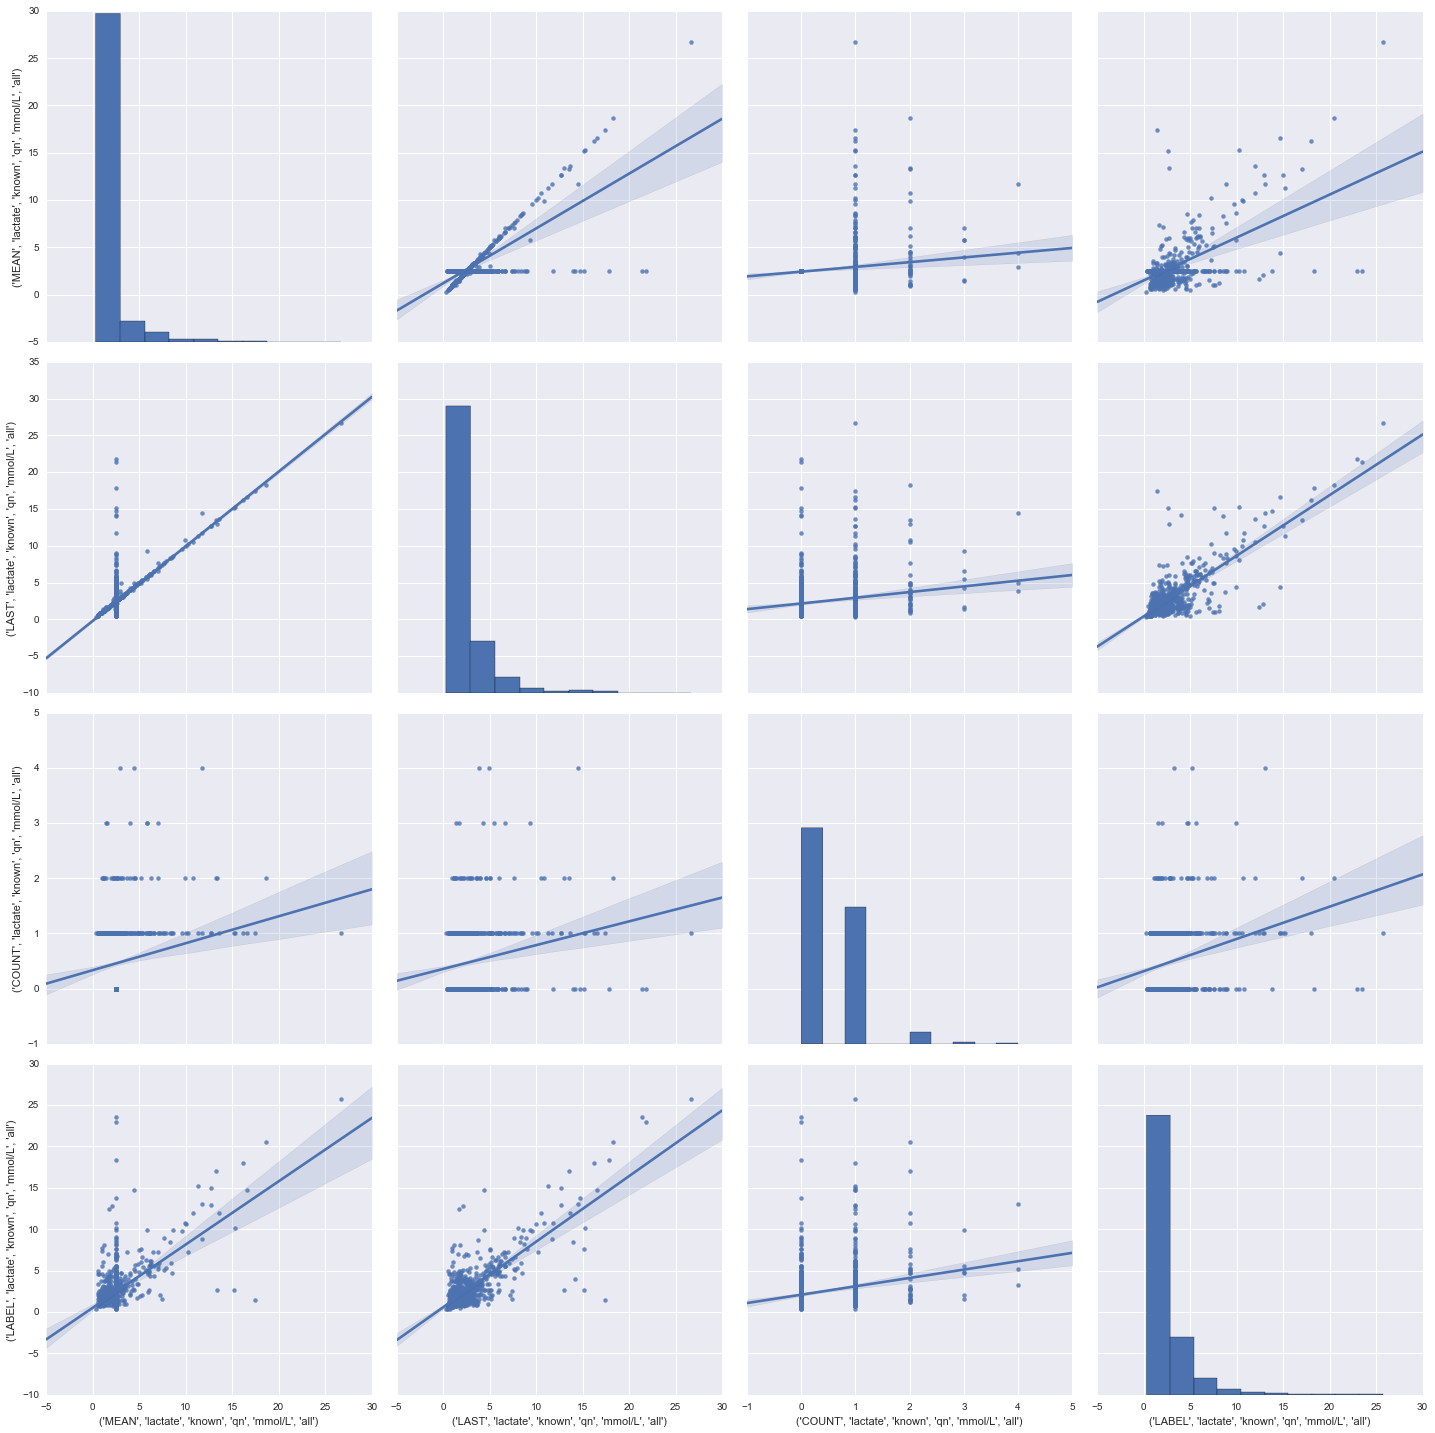

In [12]:
df_viz = X_train.join(y_train).sample(1000)
sns.pairplot(df_viz, size=5,kind="reg")

In [16]:
scaler = StandardScaler()
lin_reg = LinearRegression()

pipeline = Pipeline([
        ('scaler',scaler),
        ('lin_reg',lin_reg)
    ])

In [ ]:
pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_validate)
rmse = np.sqrt(mean_squared_error(y_validate,y_pred))
r_2 = pipeline.score(X_validate,y_validate)

In [32]:
print 'RMSE:',rmse
print 'R^2:',r_2
pd.Series(lin_reg.coef_,index=X_train.columns,name='coef').sort_values().to_frame()

RMSE: 1.58625725051
R^2: 0.542388741971


coef
feature component status variable_type units  description          
MEAN    lactate   known  qn            mmol/L all         -0.309044
COUNT   lactate   known  qn            mmol/L all          0.201063
LAST    lactate   known  qn            mmol/L all          2.043892

('MEAN', 'lactate', 'known', 'qn', 'mmol/L', 'all')


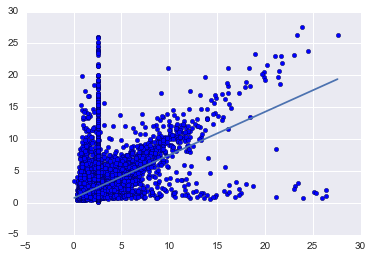

('LAST', 'lactate', 'known', 'qn', 'mmol/L', 'all')


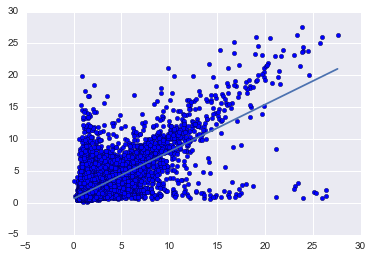

('COUNT', 'lactate', 'known', 'qn', 'mmol/L', 'all')


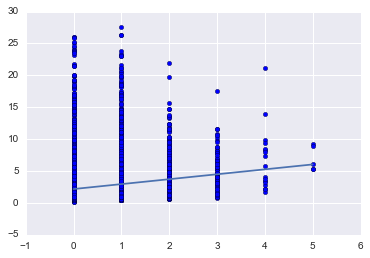

In [70]:
data = X_validate.copy()
data['pred'] = y_pred
for col_name in X_validate.columns:
    pipeline.fit(X_train.loc[:,[col_name]],y_train)
    print col_name
    val_col = data.loc[:,[col_name]].sort_values(col_name)
    sns.plt.scatter(X_validate[col_name],y_validate)
    sns.plt.plot(val_col,pipeline.predict(val_col))
    sns.plt.show()

### With Cross Validation

In [33]:
from sklearn.model_selection import cross_val_score,ShuffleSplit

In [43]:
scores_r2 = cross_val_score(pipeline,X_train,y_train, scoring='r2',cv=10)
scores_nmse = cross_val_score(pipeline,X_train,y_train, scoring='neg_mean_squared_error',cv=10)

print 'Cross Validation, K-Fold'
print 'R^2: {}, {}'.format(scores_r2.mean(),scores_r2.std())
print 'RMSE: {}, {}'.format(np.sqrt(-1.0*scores_nmse).mean(),np.sqrt(-1.0*scores_nmse).std())

cv_shuffle = ShuffleSplit(n_splits=10,test_size=0.1)

scores_r2 = cross_val_score(pipeline,X_train,y_train, scoring='r2',cv=cv_shuffle)
scores_nmse = cross_val_score(pipeline,X_train,y_train, scoring='neg_mean_squared_error', cv=cv_shuffle)

print '\nCross Validation, ShuffleSplit'
print 'R^2: {}, {}'.format(scores_r2.mean(),scores_r2.std())
print 'RMSE: {}, {}'.format(np.sqrt(-1.0*scores_nmse).mean(),np.sqrt(-1.0*scores_nmse).std())

Cross Validation, K-Fold
R2: 0.550172721419, 0.0467741587239
RMSE: 1.6467916238, 0.0985459060145

Cross Validation, ShuffleSplit
R2: 0.556988588385, 0.0212943169516
RMSE: 1.62975088077, 0.0276377946618


# Simple Data => Lactate

## Feature creation

In [232]:
reload(transformers)
reload(features)
m_ureg = units.MedicalUreg()
is_summable = lambda x: m_ureg.is_volume(str(x)) or m_ureg.is_mass(str(x))

"""
Data Specs
"""
qn_not_sum = {
    column_names.VAR_TYPE : variable_type.QUANTITATIVE,
    column_names.UNITS: lambda units: not is_summable(units)
}

weight = {
    column_names.COMPONENT : data_dict.components.WEIGHT_BODY
}

intervention_summable = {
    column_names.CLINICAL_SOURCE : clinical_source.INTERVENTION,
    column_names.UNITS: is_summable
}

uop_summable = {
    column_names.COMPONENT : data_dict.components.OUTPUT_URINE,
    column_names.UNITS: is_summable
}

not_nominal = {
    column_names.VAR_TYPE : [variable_type.QUANTITATIVE, variable_type.ORDINAL]
}

is_nominal = {
    column_names.VAR_TYPE : variable_type.NOMINAL
}

"""
Features
"""

f_qn_mean = features.Feature('MEAN','mean',
                               data_specs=[qn_not_sum,weight],
                               pre_processor=transformers.GroubyAndFFill(level=column_names.ID),
                               fillna_method=transformers.fill_mean()
                            )

f_qn_most_recent = features.Feature('LAST','last',
                                       data_specs=[qn_not_sum,weight],
                                       fillna_method=Pipeline([
                                                    ('ffill',transformers.GroubyAndFFill(level=column_names.ID)),
                                                    ('fill_mean',transformers.fill_mean())
                                                ])
                                   )

f_qn_std = features.Feature('STD','std',fillna_method=transformers.fill_zero())


f_sum = features.Feature('SUM','sum',
                             data_specs=[intervention_summable,uop_summable],
                             fillna_method=transformers.fill_zero()
                        )
f_count = features.Feature('COUNT','count',
                           data_specs=[not_nominal],
                           fillna_method=transformers.fill_zero())

f_count_nom = features.Feature('COUNT','sum',
                             data_specs=[is_nominal],
                             fillna_method=transformers.fill_zero()
                        )

label = features.Feature('LABEL','mean',{
                                column_names.COMPONENT : data_dict.components.LACTATE,
                                column_names.VAR_TYPE : variable_type.QUANTITATIVE
                            })

NameError: name 'data_dict' is not defined

In [6]:
factory.get_params()

{'ETL_manager': <mimic.MimicETLManager at 0xd8958d0>,
 'data_dict': <icu_data_defs.data_dictionary at 0xd895898>,
 'features': None,
 'force_preprocessing': True,
 'hdf5_fname_target': None,
 'pre_processors': do_nothing(),
 'resample_freq': None,
 'save_ETL_steps': False}

In [7]:
factory.hdf5_fname_target = 'data/combine_like.h5'
factory.resample_freq='2H'
factory.pre_processors = Pipeline([
                                ('drop_small_columns',transformers.remove_small_columns(threshold=50)),
                                ('drop_low_id_count',transformers.record_threshold(threshold=20)),
                                ('combine_like_columns',transformers.combine_like_cols())
                            ])
factory.features = [f_qn_mean,f_qn_most_recent,f_qn_std,f_sum,f_count,label]
factory.get_params()

{'ETL_manager': <mimic.MimicETLManager at 0xd8958d0>,
 'data_dict': <icu_data_defs.data_dictionary at 0xd895898>,
 'features': [<features.Feature at 0xeae9f60>,
 'force_preprocessing': True,
 'hdf5_fname_target': 'data/combine_like.h5',
 'pre_processors': Pipeline(steps=[('drop_small_columns', remove_small_columns(threshold=50)), ('drop_low_id_count', record_threshold(threshold=20)), ('combine_like_columns', combine_like_cols())]),
 'pre_processors__combine_like_columns': combine_like_cols(),
 'pre_processors__drop_low_id_count': record_threshold(threshold=20),
 'pre_processors__drop_low_id_count__threshold': 20,
 'pre_processors__drop_small_columns': remove_small_columns(threshold=50),
 'pre_processors__drop_small_columns__threshold': 50,
 'pre_processors__steps': [('drop_small_columns',
   remove_small_columns(threshold=50)),
  ('drop_low_id_count', record_threshold(threshold=20)),
  ('combine_like_columns', combine_like_cols())],
 'resample_freq': '2H',
 'save_ETL_steps': False}

In [8]:
df_train = factory.fit_transform(train_ids)

(2017-07-13 16:58:10) FEATURIZE... #F=6, #ids=47180, fit->True
(2017-07-13 16:58:10)>> PRE-PROCESSING & JOIN: #C=18, [u'glasgow coma scale eye opening', u'glasgow coma scale motor', u'blood pressure systolic', u'oxygen saturation pulse oximetry', u'lactate', u'hemoglobin', u'blood pressure mean', u'vasopressin', u'glasgow coma scale verbal', u'weight body', u'normal saline', u'norepinephrine', u'temperature body', u'blood pressure diastolic', u'heart rate', u'output urine', u'lactated ringers', u'respiratory rate']
(2017-07-13 16:58:10)>>>> glasgow coma scale eye opening - 1/18
(2017-07-13 16:58:10)>>>>>> READ DF...
(2017-07-13 16:58:13)<<<<<< --- (3.0s)
(2017-07-13 16:58:13)>>>>>> PREPROCESS...
(2017-07-13 16:58:13)<<<<<< --- (0.0s)
(2017-07-13 16:58:13)>>>>>> *fit* Filter columns (remove_small_columns) (764133, 1)
(2017-07-13 16:58:13)<<<<<< --- (0.0s)
(2017-07-13 16:58:13)>>>>>> *transform* Filter columns (remove_small_columns) (764133, 1)
(2017-07-13 16:58:13)<<<<<< --- (0.0s)
(201

In [9]:
df_validate = factory.transform(validate_ids)

(2017-07-13 17:50:59) FEATURIZE... #F=6, #ids=5898, fit->False
(2017-07-13 17:50:59)>> PRE-PROCESSING & JOIN: #C=18, [u'glasgow coma scale eye opening', u'glasgow coma scale motor', u'blood pressure systolic', u'oxygen saturation pulse oximetry', u'lactate', u'hemoglobin', u'blood pressure mean', u'vasopressin', u'glasgow coma scale verbal', u'weight body', u'normal saline', u'norepinephrine', u'temperature body', u'blood pressure diastolic', u'heart rate', u'output urine', u'lactated ringers', u'respiratory rate']
(2017-07-13 17:51:01)>>>> glasgow coma scale eye opening - 1/18
(2017-07-13 17:51:01)>>>>>> READ DF...
(2017-07-13 17:51:03)<<<<<< --- (2.0s)
(2017-07-13 17:51:03)>>>>>> PREPROCESS...
(2017-07-13 17:51:03)<<<<<< --- (0.0s)
(2017-07-13 17:51:03)>>>>>> *transform* Filter columns (remove_small_columns) (95854, 1)
(2017-07-13 17:51:03)<<<<<< --- (0.0s)
(2017-07-13 17:51:03)>>>>>> *transform* Filter columns (record_threshold) (95854, 1)
(2017-07-13 17:51:03)<<<<<< --- (0.0s)
(201

In [10]:
utils.deconstruct_and_write(df_train,factory.hdf5_fname_target,'train')
utils.deconstruct_and_write(df_validate,factory.hdf5_fname_target,'validate')

In [11]:
df_train.shape

(5143470, 117)

## Load Data & Set up

In [1]:
from sklearn.linear_model import LinearRegression,ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score,ShuffleSplit

In [2]:
def run_crossval(pipeline,X,y):
    scores_r2 = cross_val_score(pipeline,X,y, scoring='r2',cv=10)
    scores_nmse = cross_val_score(pipeline,X,y, scoring='neg_mean_squared_error',cv=10)

    print 'Cross Validation, K-Fold'
    print 'R^2: {}, {}'.format(scores_r2.mean(),scores_r2.std())
    print 'RMSE: {}, {}'.format(np.sqrt(-1.0*scores_nmse).mean(),np.sqrt(-1.0*scores_nmse).std())

    cv_shuffle = ShuffleSplit(n_splits=10,test_size=0.1)

    scores_r2 = cross_val_score(pipeline,X,y, scoring='r2',cv=cv_shuffle)
    scores_nmse = cross_val_score(pipeline,X,y, scoring='neg_mean_squared_error', cv=cv_shuffle)

    print '\nCross Validation, ShuffleSplit'
    print 'R^2: {}, {}'.format(scores_r2.mean(),scores_r2.std())
    print 'RMSE: {}, {}'.format(np.sqrt(-1.0*scores_nmse).mean(),np.sqrt(-1.0*scores_nmse).std())

In [5]:
import utils

From this point forward, we will be using our "simple data", resampled for 2hr intervals per the above featurizing strategies for each component

In [6]:
hdf5_fname = 'data/combine_like.h5'

In [7]:
# this can take a little while (10-15 minutes), just FYI
df_train_simple = utils.read_and_reconstruct(hdf5_fname,'train')

In [8]:
df_train_simple.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5143470 entries, (100001, 2117-09-11 10:00:00) to (199999, 2136-04-10 12:00:00)
Columns: 117 entries, (MEAN, blood pressure systolic, known, qn, mmHg, all) to (LABEL, lactate, known, qn, mmol/L, all)
dtypes: float64(83), int64(34)
memory usage: 4.5+ GB


In [9]:
df_train_simple.head()

feature                                       MEAN            \
component                  blood pressure systolic             
status                                       known   unknown   
variable_type                                   qn        qn   
units                                         mmHg    cc/min   
description                                    all       all   
id     datetime                                                
100001 2117-09-11 10:00:00              121.931614  69.78821   
       2117-09-11 12:00:00              121.931614  69.78821   
       2117-09-11 14:00:00              192.000000  69.78821   
       2117-09-11 16:00:00              130.500000  69.78821   
       2117-09-11 18:00:00              157.200000  69.78821   

feature                                                                \
component                  oxygen saturation pulse oximetry   lactate   
status                                                known     known   
variable_type                                            qn        qn   
units                                               percent    mmol/L   
description                                             all       all   
id     datetime                                                         
100001 2117-09-11 10:00:00                        97.022222  1.900000   
       2117-09-11 12:00:00                        97.022222  1.749218   
       2117-09-11 14:00:00                        97.022222  1.900000   
       2117-09-11 16:00:00                        97.022222  1.900000   
       2117-09-11 18:00:00                        99.250000  1.900000   

feature                                                                \
component                  hemoglobin blood pressure mean vasopressin   
status                          known               known       known   
variable_type                      qn                  qn          qn   
units                            g/dL                mmHg       units   
description                       all                 all         all   
id     datetime                                                         
100001 2117-09-11 10:00:00  13.000000           78.475979    1.045024   
       2117-09-11 12:00:00  11.097371           78.475979    1.045024   
       2117-09-11 14:00:00  13.000000          122.000000    1.045024   
       2117-09-11 16:00:00  13.000000           82.750000    1.045024   
       2117-09-11 18:00:00  13.000000           99.000000    1.045024   

feature                                                          ...    \
component                            weight body normal saline   ...     
status                                     known         known   ...     
variable_type                                 qn            qn   ...     
units                      units/min          kg         mL/hr   ...     
description                      all         all           all   ...     
id     datetime                                                  ...     
100001 2117-09-11 10:00:00  0.401782   82.797527     98.220699   ...     
       2117-09-11 12:00:00  0.401782   82.797527     98.220699   ...     
       2117-09-11 14:00:00  0.401782   82.797527    191.623236   ...     
       2117-09-11 16:00:00  0.401782   82.797527    304.495290   ...     
       2117-09-11 18:00:00  0.401782   82.797527     89.996990   ...     

feature                              COUNT                                  \
component                     output urine          lactated ringers         
status                             unknown                     known         
variable_type                          nom       qn               qn         
units                             no_units no_units               mL mL/hr   
description                3686_Voiding qs      all              all   all   
id     datetime                                                              
100001 2117-09-11 10:00:00               0

In [10]:
df_validate = utils.read_and_reconstruct(hdf5_fname,'validate')

In [11]:
df_validate.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 642187 entries, (100024, 2170-09-19 12:00:00) to (199993, 2161-11-17 08:00:00)
Columns: 117 entries, (MEAN, blood pressure systolic, known, qn, mmHg, all) to (LABEL, lactate, known, qn, mmol/L, all)
dtypes: float64(83), int64(34)
memory usage: 579.6+ MB


## Predict NEXT LACTATE

### Labels from lactate

In [13]:
df_train_simple.loc[:,['LABEL']].describe()

feature                LABEL
component            lactate
status                 known
variable_type             qn
units                 mmol/L
description              all
count          131100.000000
mean                2.533278
std                 2.486946
min                 0.000000
25%                 1.200000
50%                 1.800000
75%                 2.800000
max                32.000000

In [231]:
y_train = df_train_simple.loc[:,['LABEL']].shift(-1).dropna().iloc[:,0]
X_train = df_train_simple.drop('LABEL',axis=1).loc[y_train.index]

In [16]:
y_validate = df_validate.loc[:,['LABEL']].shift(-1).dropna().iloc[:,0]
X_validate = df_validate.drop('LABEL',axis=1).loc[y_validate.index]

### Make a bunch more features

In [186]:
from scipy.stats import boxcox
from sklearn.preprocessing import PolynomialFeatures

In [144]:
#use boxcox transformation to create all MEAN,LAST,SUM features as log scale
def shift_boxcox(x,lambda_1=None,lambda_2=0,alpha=None):
    return boxcox(x+lambda_2,lmbda=lambda_1,alpha=alpha)

def smart_shift_boxcox(x):
    shift = x[x > 0].min()/2.0
    return shift_boxcox(x,lambda_2=shift)[0]

def smart_shift_log(x):
    shift = x[x > 0].min()/2.0
    return np.log(x+shift)

In [177]:
X_train_log = X_train.sort_index(axis=1).loc[:,['MEAN','SUM','LAST']].apply(smart_shift_log).dropna(axis=1,how='any')

In [179]:
(X_train_log == -np.inf).sum().sort_values().sum()

0L

In [182]:
(X_train_log.apply(pd.isnull)).sum().sort_values().sum()

0L

In [183]:
(X_train_log > 5000000).sum().sort_values().sum()

0L

In [193]:
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train.iloc[:,:20])
X_train_poly.shape

(131099L, 231L)

### Feature Selection: Univariate Statistical Tests 

Reading:
- sklearn documentation on feature selection: http://scikit-learn.org/stable/modules/feature_selection.html
 

In [172]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,mutual_info_regression

In [184]:
#First, try f_regression
test_F = SelectKBest(score_func=f_regression, k=4)
test_F.fit(X=X_all, y=y_train)
# summarize scores
np.set_printoptions(precision=3)
scores_f_stat = pd.Series(test_F.scores_, index=X_all.columns)
print 'F statistic'
scores_f_stat[scores_f_stat > 100].sort_values(ascending=False)

F statistic


feature   component                         status  variable_type  units       description
LAST      lactate                           known   qn             mmol/L      all            206061.335045
MEAN      lactate                           known   qn             mmol/L      all            183167.794101
LAST_log  lactate                           known   qn             mmol/L      all            102721.867103
MEAN_log  lactate                           known   qn             mmol/L      all             96494.756565
MEAN      norepinephrine                    known   qn             mcg/kg/min  all              9948.507561
SUM       norepinephrine                    known   qn             mcg         all              9266.424960
LAST      norepinephrine                    known   qn             mcg/kg/min  all              9005.636136
COUNT     lactate                           known   qn             mmol/L      all              8548.222436
          vasopressin                       k

In [ ]:
#First, try mutual_info_regression
column_subset = scores_f_stat[scores_f_stat > 100].index
test_MI = SelectKBest(score_func=mutual_info_regression, k=4)
test_MI.fit(X=X_train.loc[:,column_subset], y=y_train)

In [43]:
scores_MI = pd.Series(test_MI.scores_, index=column_subset)
print 'Mutual Information'
scores_MI.sort_values(ascending=False, inplace=True)
scores_MI

Mutual Information


feature  component                         status   variable_type  units       description        
LAST     lactate                           known    qn             mmol/L      all                    0.415996
MEAN     lactate                           known    qn             mmol/L      all                    0.394249
COUNT    lactate                           known    qn             mmol/L      all                    0.039893
LAST     vasopressin                       known    qn             units/min   all                    0.037253
MEAN     vasopressin                       known    qn             units/min   all                    0.036767
LAST     temperature body                  known    qn             degF        all                    0.036017
SUM      output urine                      known    qn             mL          all                    0.035154
LAST     norepinephrine                    known    qn             mcg/kg/min  all                    0.034334
MEAN     bloo

In [54]:
#keep only features that are not completely independent
ft_to_keep = scores_MI[scores_MI > 0].index.tolist()

### Linear Regression

In [57]:
scaler = StandardScaler()
lin_reg = LinearRegression()

pipeline = Pipeline([
        ('scaler',scaler),
        ('lin_reg',lin_reg)
    ])

In [64]:
display(ft_to_keep)
X = X_train.loc[:,ft_to_keep]
y = y_train

run_crossval(pipeline,X,y)

[('LAST', 'lactate', 'known', 'qn', 'mmol/L', 'all'),
 ('MEAN', 'lactate', 'known', 'qn', 'mmol/L', 'all'),
 ('COUNT', 'lactate', 'known', 'qn', 'mmol/L', 'all'),
 ('LAST', 'vasopressin', 'known', 'qn', 'units/min', 'all'),
 ('MEAN', 'vasopressin', 'known', 'qn', 'units/min', 'all'),
 ('LAST', 'temperature body', 'known', 'qn', 'degF', 'all'),
 ('SUM', 'output urine', 'known', 'qn', 'mL', 'all'),
 ('LAST', 'norepinephrine', 'known', 'qn', 'mcg/kg/min', 'all'),
 ('MEAN', 'blood pressure systolic', 'known', 'qn', 'mmHg', 'all'),
 ('SUM', 'norepinephrine', 'known', 'qn', 'mcg', 'all'),
 ('COUNT', 'hemoglobin', 'known', 'qn', 'g/dL', 'all'),
 ('LAST', 'blood pressure systolic', 'known', 'qn', 'mmHg', 'all'),
 ('COUNT', 'blood pressure diastolic', 'known', 'qn', 'mmHg', 'all'),
 ('MEAN', 'norepinephrine', 'known', 'qn', 'mcg/kg/min', 'all'),
 ('MEAN', 'heart rate', 'known', 'qn', 'beats/min', 'all'),
 ('MEAN', 'oxygen saturation pulse oximetry', 'known', 'qn', 'percent', 'all'),
 ('COUNT', 

Cross Validation, K-Fold
R^2: 0.622420215047, 0.0442661206573
RMSE: 1.50723996602, 0.0840855344198

Cross Validation, ShuffleSplit
R^2: 0.622202179615, 0.0128197301283
RMSE: 1.49287683117, 0.0309458282731


In [65]:
#what about only the top 10 features
ft_subset = ft_to_keep[:10]
display(ft_subset)
X = X_train.loc[:,ft_subset]
y = y_train

run_crossval(pipeline,X,y)

[('LAST', 'lactate', 'known', 'qn', 'mmol/L', 'all'),
 ('MEAN', 'lactate', 'known', 'qn', 'mmol/L', 'all'),
 ('COUNT', 'lactate', 'known', 'qn', 'mmol/L', 'all'),
 ('LAST', 'vasopressin', 'known', 'qn', 'units/min', 'all'),
 ('MEAN', 'vasopressin', 'known', 'qn', 'units/min', 'all'),
 ('LAST', 'temperature body', 'known', 'qn', 'degF', 'all'),
 ('SUM', 'output urine', 'known', 'qn', 'mL', 'all'),
 ('LAST', 'norepinephrine', 'known', 'qn', 'mcg/kg/min', 'all'),
 ('MEAN', 'blood pressure systolic', 'known', 'qn', 'mmHg', 'all'),
 ('SUM', 'norepinephrine', 'known', 'qn', 'mcg', 'all')]

Cross Validation, K-Fold
R^2: 0.609481500224, 0.0458419477475
RMSE: 1.53282675876, 0.0852943847586

Cross Validation, ShuffleSplit
R^2: 0.617300485834, 0.0174067375634
RMSE: 1.5116581112, 0.0302020472368


In [66]:
#what about only the top 3 features (just lactate)
ft_subset = ft_to_keep[:3]
display(ft_subset)
X = X_train.loc[:,ft_subset]
y = y_train

run_crossval(pipeline,X,y)

[('LAST', 'lactate', 'known', 'qn', 'mmol/L', 'all'),
 ('MEAN', 'lactate', 'known', 'qn', 'mmol/L', 'all'),
 ('COUNT', 'lactate', 'known', 'qn', 'mmol/L', 'all')]

Cross Validation, K-Fold
R^2: 0.603299205901, 0.0437181370702
RMSE: 1.5458364002, 0.0916080291197

Cross Validation, ShuffleSplit
R^2: 0.607198386216, 0.0154803771698
RMSE: 1.54443026751, 0.0334231132899


In [74]:
pipeline.fit(X,y)
y_pred = pipeline.predict(X_validate.loc[:,ft_subset])
rmse = np.sqrt(mean_squared_error(y_validate,y_pred))
r_2 = pipeline.score(X_validate.loc[:,ft_subset],y_validate)
print 'RMSE:',rmse
print 'R^2:',r_2
pd.Series(lin_reg.coef_,index=X.columns,name='coef').sort_values().to_frame()

[('LAST', 'lactate', 'known', 'qn', 'mmol/L', 'all'),
 ('MEAN', 'lactate', 'known', 'qn', 'mmol/L', 'all'),
 ('COUNT', 'lactate', 'known', 'qn', 'mmol/L', 'all')]

RMSE: 1.49961351463
R^2: 0.591014273736


coef
feature component status variable_type units  description          
COUNT   lactate   known  qn            mmol/L all          0.080479
MEAN    lactate   known  qn            mmol/L all          0.213287
LAST    lactate   known  qn            mmol/L all          1.715051

In [67]:
#what about everything except the top 3 features (no lactate)
ft_subset = ft_to_keep[3:]
display(ft_subset)
X = X_train.loc[:,ft_subset]
y = y_train

run_crossval(pipeline,X,y)

[('LAST', 'vasopressin', 'known', 'qn', 'units/min', 'all'),
 ('MEAN', 'vasopressin', 'known', 'qn', 'units/min', 'all'),
 ('LAST', 'temperature body', 'known', 'qn', 'degF', 'all'),
 ('SUM', 'output urine', 'known', 'qn', 'mL', 'all'),
 ('LAST', 'norepinephrine', 'known', 'qn', 'mcg/kg/min', 'all'),
 ('MEAN', 'blood pressure systolic', 'known', 'qn', 'mmHg', 'all'),
 ('SUM', 'norepinephrine', 'known', 'qn', 'mcg', 'all'),
 ('COUNT', 'hemoglobin', 'known', 'qn', 'g/dL', 'all'),
 ('LAST', 'blood pressure systolic', 'known', 'qn', 'mmHg', 'all'),
 ('COUNT', 'blood pressure diastolic', 'known', 'qn', 'mmHg', 'all'),
 ('MEAN', 'norepinephrine', 'known', 'qn', 'mcg/kg/min', 'all'),
 ('MEAN', 'heart rate', 'known', 'qn', 'beats/min', 'all'),
 ('MEAN', 'oxygen saturation pulse oximetry', 'known', 'qn', 'percent', 'all'),
 ('COUNT', 'blood pressure systolic', 'known', 'qn', 'mmHg', 'all'),
 ('MEAN', 'temperature body', 'known', 'qn', 'degF', 'all'),
 ('COUNT', 'heart rate', 'known', 'qn', 'bea

Cross Validation, K-Fold
R^2: 0.189424749758, 0.0465986925613
RMSE: 2.21729405564, 0.169855331145

Cross Validation, ShuffleSplit
R^2: 0.216514087631, 0.0127902734363
RMSE: 2.20940132041, 0.0415296149012


In [93]:
pipeline.fit(X,y)
y_pred = pipeline.predict(X_validate.loc[:,ft_subset])
rmse = np.sqrt(mean_squared_error(y_validate,y_pred))
r_2 = pipeline.score(X_validate.loc[:,ft_subset],y_validate)
print 'RMSE:',rmse
print 'R^2:',r_2

RMSE: 2.17298373678
R^2: 0.141258578157


In [185]:
coef = pd.Series(lin_reg.coef_,index=X.columns,name='coef')
np.set_printoptions(precision=2)
coef.loc[coef.abs().sort_values(ascending=False).index].astype(np.float16).to_frame()

coef
feature component                        status  variable_type units      description                  
COUNT   output urine                     unknown nom           no_units   3686(ml)_Voiding qs       inf
                                                                          3686(ml)_No Void         -inf
                                                                          3686_Voiding qs          -inf
        blood pressure systolic          known   qn            mmHg       all                  1.385742
        blood pressure diastolic         known   qn            mmHg       all                 -1.330078
STD     lactate                          known   qn            mmol/L     all                  0.316650
COUNT   hemoglobin                       known   qn            g/dL       all                  0.271240
MEAN    vasopressin                      known   qn            units/min  all                 -0.262451
COUNT   vasopressin                      known   qn            units/min  all                  0.234985
MEAN    oxygen saturation pulse oximetry known   qn            percent    all                 -0.214600
SUM     norepinephrine                   known   qn            mcg        all                  0.210205
LAST    heart rate                       known   qn            beats/min  all                  0.207031
MEAN    blood pressure systolic          known   qn            mmHg       all                 -0.190430
        norepinephrine                   known   qn            mcg/kg/min all                  0.188232
LAST    vasopressin                      known   qn            units/min  all                  0.171265
SUM     output urine                     known   qn            mL         all                 -0.151367
MEAN    temperature body                 known   qn            degF       all                 -0.138062
COUNT   temperature body                 known   qn            degF       all                  0.134277
MEAN    respiratory rate                 known   qn            insp/min   all                  0.132446
COUNT   normal saline                    known   qn            mL/hr      all                  0.127930
LAST    norepinephrine                   known   qn            mcg/min    all                  0.117065
COUNT   vasopressin                      known   qn            units      all                  0.111328
        norepinephrine                   known   qn            mcg        all                  0.106934
MEAN    norepinephrine                   known   qn            mcg/min    all                 -0.104797
LAST    norepinephrine                   known   qn            mcg/kg/min all                  0.104126
SUM     lactated ringers                 known   qn            mL         all                  0.088989
STD     norepinephrine                   known   qn            mcg/kg/min all                 -0.083679
LAST    vasopressin                      known   qn            units      all                  0.078735
COUNT   norepinephrine                   known   qn            mcg/kg/min all                  0.066528
LAST    oxygen saturation pulse oximetry known   qn            percent    all                 -0.058716
COUNT   heart rate                       known   qn            beats/min  all                 -0.052826
LAST    respiratory rate                 known   qn            insp/min   all                  0.046234
COUNT   output urine                     known   qn            mL         all                  0.038727
STD     norepinephrine                   known   qn            mcg        all                 -0.036499
COUNT   norepinephrine                   known   qn            mcg/min    all                  0.034180
STD     output urine                     known   qn            mL         all                  0.033203
        hemoglobin                       known   qn            g/dL       all                  0.027985
LAST    temperature body                 kn

In [68]:
#what about everything except the top 10 non-lactate features (no lactate)
ft_subset = ft_to_keep[3:13]
display(ft_subset)
X = X_train.loc[:,ft_subset]
y = y_train

run_crossval(pipeline,X,y)

[('LAST', 'vasopressin', 'known', 'qn', 'units/min', 'all'),
 ('MEAN', 'vasopressin', 'known', 'qn', 'units/min', 'all'),
 ('LAST', 'temperature body', 'known', 'qn', 'degF', 'all'),
 ('SUM', 'output urine', 'known', 'qn', 'mL', 'all'),
 ('LAST', 'norepinephrine', 'known', 'qn', 'mcg/kg/min', 'all'),
 ('MEAN', 'blood pressure systolic', 'known', 'qn', 'mmHg', 'all'),
 ('SUM', 'norepinephrine', 'known', 'qn', 'mcg', 'all'),
 ('COUNT', 'hemoglobin', 'known', 'qn', 'g/dL', 'all'),
 ('LAST', 'blood pressure systolic', 'known', 'qn', 'mmHg', 'all'),
 ('COUNT', 'blood pressure diastolic', 'known', 'qn', 'mmHg', 'all')]

Cross Validation, K-Fold
R^2: 0.103753971611, 0.0755201671306
RMSE: 2.32920660434, 0.172847896719

Cross Validation, ShuffleSplit
R^2: 0.127022629955, 0.0144089421445
RMSE: 2.32325614946, 0.0195046834546


### Ridge Regression

In [196]:
from sklearn.linear_model import Ridge

In [197]:
scaler = StandardScaler()
ridge_reg = Ridge(alpha=0.5)

pipeline_ridge = Pipeline([
        ('scaler',scaler),
        ('ridge_reg',ridge_reg)
    ])

In [198]:
#what about only the top 3 features (just lactate)
ft_subset = ft_to_keep[:3]
display(ft_subset)
X = X_train.loc[:,ft_subset]
y = y_train

run_crossval(pipeline_ridge,X,y)

[('LAST', 'lactate', 'known', 'qn', 'mmol/L', 'all'),
 ('MEAN', 'lactate', 'known', 'qn', 'mmol/L', 'all'),
 ('COUNT', 'lactate', 'known', 'qn', 'mmol/L', 'all')]

Cross Validation, K-Fold
R^2: 0.603299205308, 0.043718179257
RMSE: 1.5458363785, 0.0916077642775

Cross Validation, ShuffleSplit
R^2: 0.614953366884, 0.0104873401688
RMSE: 1.54301052763, 0.0335509061572


In [207]:
#what about everything except the top 3 features (no lactate)
ft_subset = ft_to_keep[3:]
display(ft_subset)
X = X_train.loc[:,ft_subset]
y = y_train

run_crossval(pipeline_ridge,X,y)

[('LAST', 'vasopressin', 'known', 'qn', 'units/min', 'all'),
 ('MEAN', 'vasopressin', 'known', 'qn', 'units/min', 'all'),
 ('LAST', 'temperature body', 'known', 'qn', 'degF', 'all'),
 ('SUM', 'output urine', 'known', 'qn', 'mL', 'all'),
 ('LAST', 'norepinephrine', 'known', 'qn', 'mcg/kg/min', 'all'),
 ('MEAN', 'blood pressure systolic', 'known', 'qn', 'mmHg', 'all'),
 ('SUM', 'norepinephrine', 'known', 'qn', 'mcg', 'all'),
 ('COUNT', 'hemoglobin', 'known', 'qn', 'g/dL', 'all'),
 ('LAST', 'blood pressure systolic', 'known', 'qn', 'mmHg', 'all'),
 ('COUNT', 'blood pressure diastolic', 'known', 'qn', 'mmHg', 'all'),
 ('MEAN', 'norepinephrine', 'known', 'qn', 'mcg/kg/min', 'all'),
 ('MEAN', 'heart rate', 'known', 'qn', 'beats/min', 'all'),
 ('MEAN', 'oxygen saturation pulse oximetry', 'known', 'qn', 'percent', 'all'),
 ('COUNT', 'blood pressure systolic', 'known', 'qn', 'mmHg', 'all'),
 ('MEAN', 'temperature body', 'known', 'qn', 'degF', 'all'),
 ('COUNT', 'heart rate', 'known', 'qn', 'bea

Cross Validation, K-Fold
R^2: 0.189441318892, 0.0465687690099
RMSE: 2.21727618395, 0.169888960662

Cross Validation, ShuffleSplit
R^2: 0.215310922663, 0.0161840844225
RMSE: 2.1902704788, 0.0213265878904


In [208]:
pipeline_ridge.fit(X,y)
y_pred = pipeline_ridge.predict(X_validate.loc[:,ft_subset])
rmse = np.sqrt(mean_squared_error(y_validate,y_pred))
r_2 = pipeline_ridge.score(X_validate.loc[:,ft_subset],y_validate)
print 'RMSE:',rmse
print 'R^2:',r_2

RMSE: 2.17294211726
R^2: 0.141291473077


In [209]:
coef = pd.Series(ridge_reg.coef_,index=X.columns,name='coef')
np.set_printoptions(precision=2)
coef.loc[coef.abs().sort_values(ascending=False).index].astype(np.float16).to_frame()

coef
feature component                        status  variable_type units      description                  
COUNT   blood pressure systolic          known   qn            mmHg       all                  1.362305
        blood pressure diastolic         known   qn            mmHg       all                 -1.306641
STD     lactate                          known   qn            mmol/L     all                  0.316406
COUNT   hemoglobin                       known   qn            g/dL       all                  0.271973
MEAN    vasopressin                      known   qn            units/min  all                 -0.262207
COUNT   vasopressin                      known   qn            units/min  all                  0.234985
MEAN    oxygen saturation pulse oximetry known   qn            percent    all                 -0.214600
SUM     norepinephrine                   known   qn            mcg        all                  0.210205
LAST    heart rate                       known   qn            beats/min  all                  0.205566
MEAN    blood pressure systolic          known   qn            mmHg       all                 -0.189453
        norepinephrine                   known   qn            mcg/kg/min all                  0.188110
LAST    vasopressin                      known   qn            units/min  all                  0.171143
SUM     output urine                     known   qn            mL         all                 -0.152832
MEAN    temperature body                 known   qn            degF       all                 -0.137939
COUNT   temperature body                 known   qn            degF       all                  0.134155
MEAN    respiratory rate                 known   qn            insp/min   all                  0.132202
COUNT   normal saline                    known   qn            mL/hr      all                  0.128052
LAST    norepinephrine                   known   qn            mcg/min    all                  0.116821
COUNT   vasopressin                      known   qn            units      all                  0.111328
        norepinephrine                   known   qn            mcg        all                  0.106567
MEAN    norepinephrine                   known   qn            mcg/min    all                 -0.104614
LAST    norepinephrine                   known   qn            mcg/kg/min all                  0.104187
SUM     lactated ringers                 known   qn            mL         all                  0.088989
STD     norepinephrine                   known   qn            mcg/kg/min all                 -0.083740
LAST    vasopressin                      known   qn            units      all                  0.078674
COUNT   norepinephrine                   known   qn            mcg/kg/min all                  0.066467
        output urine                     unknown nom           no_units   3686(ml)_Voiding qs -0.066162
                                                                          3686(ml)_No Void    -0.066162
                                                                          3686_Voiding qs     -0.066162
LAST    oxygen saturation pulse oximetry known   qn            percent    all                 -0.058807
COUNT   heart rate                       known   qn            beats/min  all                 -0.052551
LAST    respiratory rate                 known   qn            insp/min   all                  0.046387
COUNT   output urine                     known   qn            mL         all                  0.038910
STD     norepinephrine                   known   qn            mcg        all                 -0.036407
COUNT   norepinephrine                   known   qn            mcg/min    all                  0.034271
STD     output urine                     known   qn            mL         all                  0.033234
        hemoglobin                       known   qn            g/dL       all                  0.028030
LAST    temperature body                 kn

## LASSO

## Elastic net

## Predict DELTA Lactate

In [95]:
id_grouped = df_train_simple.loc[:,['LABEL']].groupby(level='id')

In [96]:
lac_filled = id_grouped.ffill()
lac_next = id_grouped.shift(-1)

In [97]:
lac_all = lac_filled
lac_all.columns = ['last']
lac_all['next'] = lac_next

In [104]:
lac_all = lac_all.dropna()

In [105]:
lac_all['delta'] = lac_all['next'] - lac_all['last']

In [106]:
lac_all['delta']

id      datetime           
100007  2145-04-02 14:00:00   -1.200000
100010  2109-12-10 12:00:00    0.300000
100012  2177-03-14 10:00:00    0.200000
        2177-03-15 08:00:00   -0.400000
        2177-03-15 14:00:00    0.500000
        2177-03-15 20:00:00   -0.800000
100018  2176-08-30 08:00:00   -0.400000
        2176-08-30 10:00:00    0.050000
        2176-08-30 12:00:00    0.150000
100020  2142-12-03 00:00:00   -0.100000
100028  2142-12-24 14:00:00   -1.700000
        2142-12-25 02:00:00   -0.400000
100034  2164-04-23 10:00:00    1.300000
100035  2115-02-22 08:00:00   -0.600000
        2115-02-22 12:00:00    2.600000
        2115-02-22 14:00:00    1.900000
        2115-02-22 16:00:00    1.300000
        2115-02-22 18:00:00   -0.100000
        2115-02-22 20:00:00   -0.400000
        2115-02-22 22:00:00    0.100000
        2115-02-23 04:00:00    0.800000
        2115-02-23 10:00:00   -1.100000
        2115-02-23 12:00:00   -0.400000
        2115-02-23 20:00:00   -2.300000
        2115

In [111]:
y_train = lac_all['delta']
X_train = df_train_simple.drop('LABEL',axis=1).loc[y_train.index]

In [113]:
print X_train.shape,y_train.shape

 (103614, 116) (103614L,)


In [114]:
%matplotlib inline

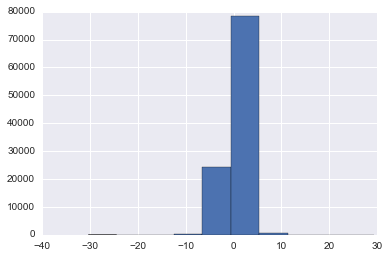

In [115]:
y_train.hist()

In [116]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,mutual_info_regression

In [119]:
#First, try f_regression
test_F = SelectKBest(score_func=f_regression, k=4)
test_F.fit(X=X_train, y=y_train)
# summarize scores
np.set_printoptions(precision=3)
scores_f_stat = pd.Series(test_F.scores_, index=X_train.columns)
print 'F statistic'
scores_f_stat.sort_values(ascending=False).to_frame().head(60)

F statistic


0
feature component                        status  variable_type units      description                      
LAST    lactate                          known   qn            mmol/L     all                   5121.703950
MEAN    lactate                          known   qn            mmol/L     all                   4405.805231
COUNT   output urine                     known   qn            mL         all                    824.431294
                                         unknown nom           no_units   3686(ml)_No Void       824.249418
                                                                          3686(ml)_Voiding qs    824.249418
                                                                          3686_Voiding qs        824.249418
        hemoglobin                       known   qn            g/dL       all                    824.212850
LAST    hemoglobin                       known   qn            g/dL       all                    587.076624
MEAN    respiratory rate                 known   qn            insp/min   all                    583.837514
SUM     output urine                     known   qn            mL         all                    572.123998
LAST    respiratory rate                 known   qn            insp/min   all                    560.276342
        oxygen saturation pulse oximetry known   qn            percent    all                    542.806918
MEAN    oxygen saturation pulse oximetry known   qn            percent    all                    496.861685
STD     hemoglobin                       known   qn            g/dL       all                    436.301842
MEAN    hemoglobin                       known   qn            g/dL       all                    391.429354
        heart rate                       known   qn            beats/min  all                    316.353842
        blood pressure diastolic         known   qn            mmHg       all                    204.089980
LAST    norepinephrine                   known   qn            mcg/kg/min all                    197.558528
COUNT   glasgow coma scale verbal        known   ord           no_units   all                    190.630230
        glasgow coma scale eye opening   known   ord           no_units   all                    190.582698
        glasgow coma scale motor         known   ord           no_units   all                    189.051236
LAST    heart rate                       known   qn            beats/min  all                    186.148321
MEAN    norepinephrine                   known   qn            mcg/kg/min all                    181.673583
        blood pressure systolic          known   qn            mmHg       all                    179.492879
SUM     norepinephrine                   known   qn            mcg        all                    170.609542
COUNT   lactate                          known   qn            mmol/L     all                    169.692445
STD     output urine                     known   qn            mL         all                    161.613709
LAST    blood pressure systolic          known   qn            mmHg       all                    148.085099
        blood pressure diastolic         known   qn            mmHg       all                    135.673055
COUNT   vasopressin                      known   qn            units/min  all                    134.616420
        temperature body                 known   qn            degF       all                    132.745661
STD     lactate                          known   qn            mmol/L     all                    131.650040
        blood pressure diastolic         known   qn            mmHg       all                     98.570392
        blood pressure systolic          known   qn            mmHg       all                     89.839651
COUNT   norepinephrine                   known   qn            mcg/kg/min all                     77.443307
        lactated ringers                 known   qn            mL         all                     72.431532
  

In [120]:
scores_f_stat[scores_f_stat > 100].sort_values(ascending=False)

feature  component                         status   variable_type  units       description        
LAST     lactate                           known    qn             mmol/L      all                    5121.703950
MEAN     lactate                           known    qn             mmol/L      all                    4405.805231
COUNT    output urine                      known    qn             mL          all                     824.431294
                                           unknown  nom            no_units    3686_Voiding qs         824.249418
                                                                               3686(ml)_No Void        824.249418
                                                                               3686(ml)_Voiding qs     824.249418
         hemoglobin                        known    qn             g/dL        all                     824.212850
LAST     hemoglobin                        known    qn             g/dL        all                     

In [121]:
#Then, try mutual_info_regression
column_subset = scores_f_stat[scores_f_stat > 100].index
test_MI = SelectKBest(score_func=mutual_info_regression, k=4)
test_MI.fit(X=X_train.loc[:,column_subset], y=y_train)

SelectKBest(k=4,
      score_func=<function mutual_info_regression at 0x000000000D259978>)

In [122]:
scores_MI = pd.Series(test_MI.scores_, index=column_subset)
print 'Mutual Information'
scores_MI.sort_values(ascending=False, inplace=True)
scores_MI

Mutual Information


feature  component                         status   variable_type  units       description        
LAST     lactate                           known    qn             mmol/L      all                    0.269033
MEAN     lactate                           known    qn             mmol/L      all                    0.252243
COUNT    lactate                           known    qn             mmol/L      all                    0.048210
STD      lactate                           known    qn             mmol/L      all                    0.044504
MEAN     blood pressure systolic           known    qn             mmHg        all                    0.040341
LAST     blood pressure systolic           known    qn             mmHg        all                    0.038664
COUNT    hemoglobin                        known    qn             g/dL        all                    0.037712
LAST     heart rate                        known    qn             beats/min   all                    0.036297
         oxyg

In [125]:
#keep only features that are not completely independent
ft_to_keep = scores_MI[scores_MI > 0].index.tolist()

In [126]:
scaler = StandardScaler()
lin_reg = LinearRegression()

pipeline = Pipeline([
        ('scaler',scaler),
        ('lin_reg',lin_reg)
    ])

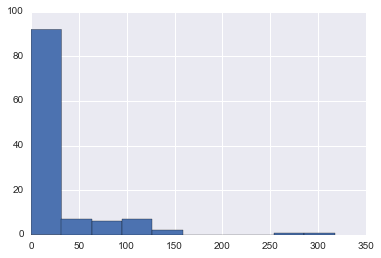

In [131]:
X_train.iloc[0].hist()

In [130]:
y_train.head()

id      datetime           
100007  2145-04-02 14:00:00   -1.2
100010  2109-12-10 12:00:00    0.3
100012  2177-03-14 10:00:00    0.2
        2177-03-15 08:00:00   -0.4
        2177-03-15 14:00:00    0.5
Name: delta, dtype: float64

In [127]:
X_train.loc[:,ft_to_keep].shape

(103614, 31)

In [128]:
display(ft_to_keep)
X = X_train.loc[:,ft_to_keep]
y = y_train

run_crossval(pipeline,X,y)

[('LAST', 'lactate', 'known', 'qn', 'mmol/L', 'all'),
 ('MEAN', 'lactate', 'known', 'qn', 'mmol/L', 'all'),
 ('COUNT', 'lactate', 'known', 'qn', 'mmol/L', 'all'),
 ('STD', 'lactate', 'known', 'qn', 'mmol/L', 'all'),
 ('MEAN', 'blood pressure systolic', 'known', 'qn', 'mmHg', 'all'),
 ('LAST', 'blood pressure systolic', 'known', 'qn', 'mmHg', 'all'),
 ('COUNT', 'hemoglobin', 'known', 'qn', 'g/dL', 'all'),
 ('LAST', 'heart rate', 'known', 'qn', 'beats/min', 'all'),
 ('LAST', 'oxygen saturation pulse oximetry', 'known', 'qn', 'percent', 'all'),
 ('MEAN', 'respiratory rate', 'known', 'qn', 'insp/min', 'all'),
 ('MEAN', 'heart rate', 'known', 'qn', 'beats/min', 'all'),
 ('MEAN', 'oxygen saturation pulse oximetry', 'known', 'qn', 'percent', 'all'),
 ('LAST', 'respiratory rate', 'known', 'qn', 'insp/min', 'all'),
 ('SUM', 'output urine', 'known', 'qn', 'mL', 'all'),
 ('MEAN', 'blood pressure diastolic', 'known', 'qn', 'mmHg', 'all'),
 ('COUNT', 'output urine', 'unknown', 'nom', 'no_units', '3

Cross Validation, K-Fold
R^2: 0.114040689882, 0.0133743001894
RMSE: 1.26323854479, 0.0694617794055

Cross Validation, ShuffleSplit
R^2: 0.113702774615, 0.00551556543904
RMSE: 1.27302288592, 0.0296756264639


In [137]:
display(pd.DataFrame(ft_to_keep[:4], columns = X_train.columns.names))
X = X_train.loc[:,ft_to_keep[:4]]
y = y_train

run_crossval(pipeline,X,y)

feature component status variable_type   units description
0    LAST   lactate  known            qn  mmol/L         all
1    MEAN   lactate  known            qn  mmol/L         all
2   COUNT   lactate  known            qn  mmol/L         all
3     STD   lactate  known            qn  mmol/L         all

Cross Validation, K-Fold
R^2: 0.0586587824567, 0.0116600441805
RMSE: 1.30226321647, 0.0739792056815

Cross Validation, ShuffleSplit
R^2: 0.0544639418642, 0.00680518065802
RMSE: 1.30526405426, 0.043709856272


In [140]:
ft_subset = ft_to_keep[4:]
display(pd.DataFrame(ft_subset, columns = X_train.columns.names).sort_values('component'))
X = X_train.loc[:,ft_subset]
y = y_train

run_crossval(pipeline,X,y)

feature                         component   status variable_type  \
13    LAST          blood pressure diastolic    known            qn   
10    MEAN          blood pressure diastolic    known            qn   
0     MEAN           blood pressure systolic    known            qn   
1     LAST           blood pressure systolic    known            qn   
25   COUNT    glasgow coma scale eye opening    known           ord   
23   COUNT          glasgow coma scale motor    known           ord   
24   COUNT         glasgow coma scale verbal    known           ord   
3     LAST                        heart rate    known            qn   
6     MEAN                        heart rate    known            qn   
19    LAST                        hemoglobin    known            qn   
18    MEAN                        hemoglobin    known            qn   
2    COUNT                        hemoglobin    known            qn   
14     STD                        hemoglobin    known            qn   
20    LAST                    norepinephrine    known            qn   
22    MEAN                    norepinephrine    known            qn   
11   COUNT                      output urine  unknown           nom   
9      SUM                      output urine    known            qn   
15   COUNT                      output urine  unknown           nom   
16   COUNT                      output urine    known            qn   
17     STD                      output urine    known            qn   
12   COUNT                      output urine  unknown           nom   
7     MEAN  oxygen saturation pulse oximetry    known            qn   
4     LAST  oxygen saturation pulse oximetry    known            qn   
8     LAST                  respiratory rate    known            qn   
5     MEAN                  respiratory rate    known            qn   
21   COUNT                  temperature body    known            qn   
26   COUNT                       vasopressin    known            qn   

         units          description  
13        mmHg                  all  
10        mmHg                  all  
0         mmHg                  all  
1         mmHg                  all  
25    no_units                  all  
23    no_units                  all  
24    no_units                  all  
3    beats/min                  all  
6    beats/min                  all  
19        g/dL                  all  
18        g/dL                  all  
2         g/dL                  all  
14        g/dL                  all  
20  mcg/kg/min                  all  
22  mcg/kg/min                  all  
11    no_units      3686_Voiding qs  
9           mL                  all  
15    no_units     3686(ml)_No Void  
16          mL                  all  
17          mL                  all  
12    no_units  3686(ml)_Voiding qs  
7      percent                  all  
4      percent                  all  
8     insp/min                  all  
5     insp/min                  all  
21        degF                  all  
26   units/min                  all

Cross Validation, K-Fold
R^2: 0.0319361339321, 0.00456736679582
RMSE: 1.32049694072, 0.071864874518

Cross Validation, ShuffleSplit
R^2: 0.0324873008507, 0.00390809431423
RMSE: 1.30736495491, 0.0368334916341


@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
('MEAN', 'blood pressure systolic', 'known', 'qn', 'mmHg', 'all')


count    103614.000000
mean        117.052692
std          19.336874
min           0.000000
25%         104.000000
50%         119.333333
75%         124.000000
max         264.600000
Name: (MEAN, blood pressure systolic, known, qn, mmHg, all), dtype: float64

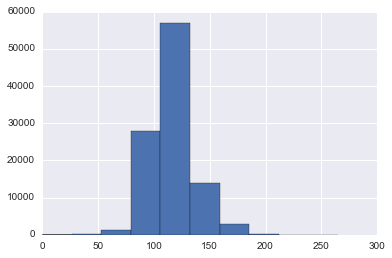

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
('LAST', 'blood pressure systolic', 'known', 'qn', 'mmHg', 'all')


count    103614.000000
mean        117.167958
std          21.516603
min           0.000000
25%         103.000000
50%         119.000000
75%         126.000000
max         279.000000
Name: (LAST, blood pressure systolic, known, qn, mmHg, all), dtype: float64

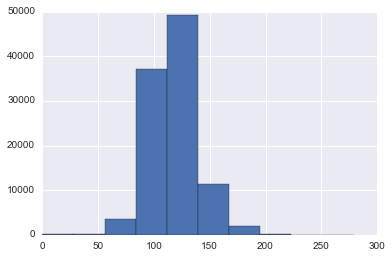

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
('COUNT', 'hemoglobin', 'known', 'qn', 'g/dL', 'all')


count    103614.000000
mean          0.369014
std           0.708152
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           8.000000
Name: (COUNT, hemoglobin, known, qn, g/dL, all), dtype: float64

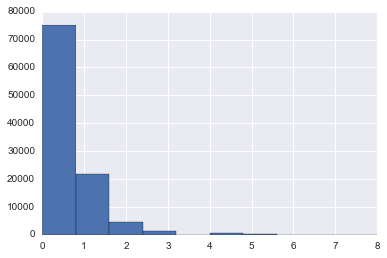

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
('LAST', 'heart rate', 'known', 'qn', 'beats/min', 'all')


count    103614.000000
mean         91.683936
std          17.608580
min           0.000000
25%          80.000000
50%          94.000000
75%         100.000000
max         256.000000
Name: (LAST, heart rate, known, qn, beats/min, all), dtype: float64

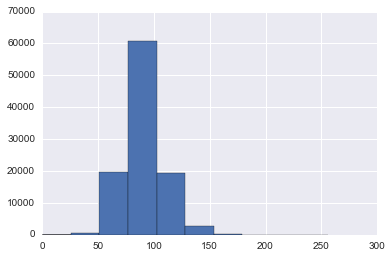

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
('LAST', 'oxygen saturation pulse oximetry', 'known', 'qn', 'percent', 'all')


count    103614.000000
mean         96.840750
std           4.976904
min           0.000000
25%          96.000000
50%          97.000000
75%          99.000000
max         100.000000
Name: (LAST, oxygen saturation pulse oximetry, known, qn, percent, all), dtype: float64

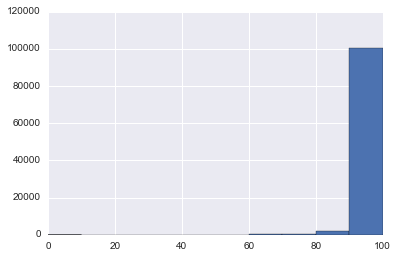

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
('MEAN', 'respiratory rate', 'known', 'qn', 'insp/min', 'all')


count    103614.000000
mean         20.614695
std           5.648175
min           0.000000
25%          17.300000
50%          20.112851
75%          23.400000
max          93.000000
Name: (MEAN, respiratory rate, known, qn, insp/min, all), dtype: float64

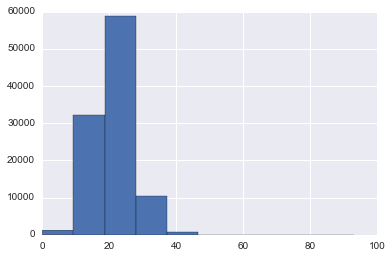

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
('MEAN', 'heart rate', 'known', 'qn', 'beats/min', 'all')


count    103614.000000
mean         93.182155
std          17.292502
min           0.000000
25%          80.714286
50%          95.500000
75%         102.321742
max         220.000000
Name: (MEAN, heart rate, known, qn, beats/min, all), dtype: float64

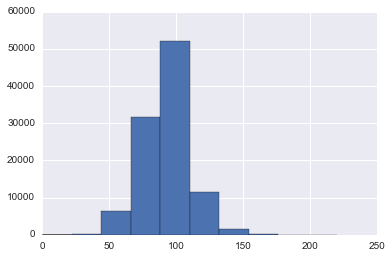

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
('MEAN', 'oxygen saturation pulse oximetry', 'known', 'qn', 'percent', 'all')


count    103614.000000
mean         96.891940
std           4.421747
min           0.000000
25%          96.333333
50%          97.022222
75%          99.000000
max         100.000000
Name: (MEAN, oxygen saturation pulse oximetry, known, qn, percent, all), dtype: float64

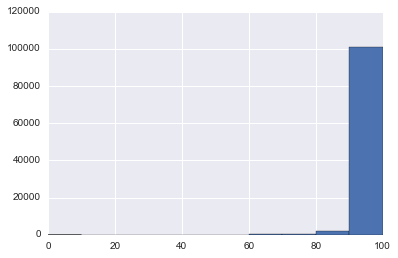

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
('LAST', 'respiratory rate', 'known', 'qn', 'insp/min', 'all')


count    103614.000000
mean         20.582440
std           6.228727
min           0.000000
25%          17.000000
50%          20.015902
75%          24.000000
max         115.000000
Name: (LAST, respiratory rate, known, qn, insp/min, all), dtype: float64

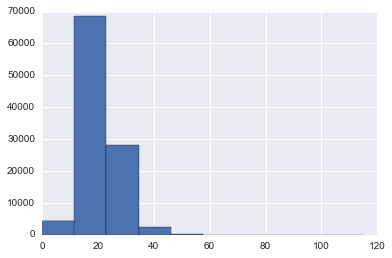

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
('SUM', 'output urine', 'known', 'qn', 'mL', 'all')


count    103614.000000
mean        105.191149
std         182.456413
min           0.000000
25%           0.000000
50%          40.000000
75%         140.000000
max        6675.000000
Name: (SUM, output urine, known, qn, mL, all), dtype: float64

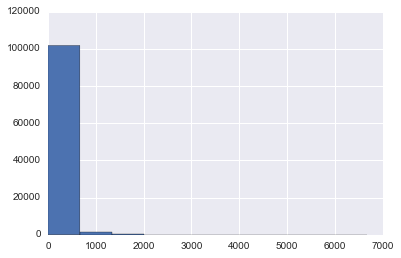

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
('MEAN', 'blood pressure diastolic', 'known', 'qn', 'mmHg', 'all')


count    103614.000000
mean         59.016396
std          11.665412
min           0.000000
25%          52.250000
50%          58.820530
75%          64.000000
max         183.500000
Name: (MEAN, blood pressure diastolic, known, qn, mmHg, all), dtype: float64

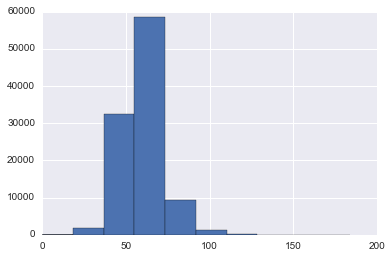

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
('COUNT', 'output urine', 'unknown', 'nom', 'no_units', '3686_Voiding qs')


count    103614.000000
mean          1.076003
std           0.913084
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max           8.000000
Name: (COUNT, output urine, unknown, nom, no_units, 3686_Voiding qs), dtype: float64

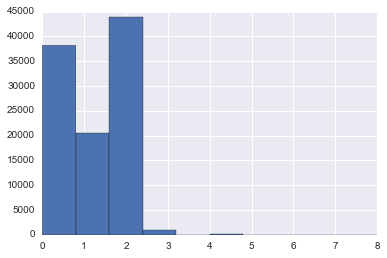

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
('COUNT', 'output urine', 'unknown', 'nom', 'no_units', '3686(ml)_Voiding qs')


count    103614.000000
mean          1.076003
std           0.913084
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max           8.000000
Name: (COUNT, output urine, unknown, nom, no_units, 3686(ml)_Voiding qs), dtype: float64

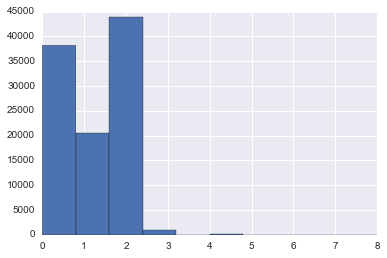

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
('LAST', 'blood pressure diastolic', 'known', 'qn', 'mmHg', 'all')


count    103614.000000
mean         59.238875
std          13.020916
min           0.000000
25%          51.000000
50%          60.172308
75%          65.000000
max         298.000000
Name: (LAST, blood pressure diastolic, known, qn, mmHg, all), dtype: float64

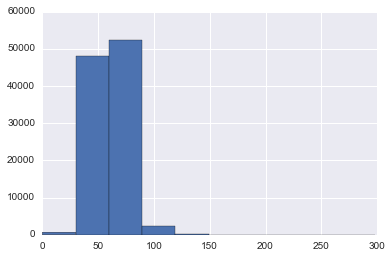

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
('STD', 'hemoglobin', 'known', 'qn', 'g/dL', 'all')


count    103614.000000
mean          0.048572
std           0.269877
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          10.818734
Name: (STD, hemoglobin, known, qn, g/dL, all), dtype: float64

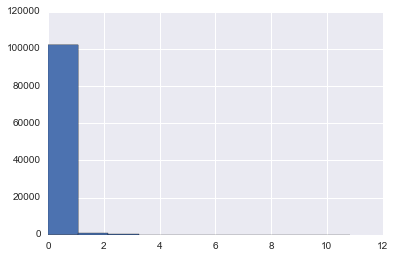

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
('COUNT', 'output urine', 'unknown', 'nom', 'no_units', '3686(ml)_No Void')


count    103614.000000
mean          1.076003
std           0.913084
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max           8.000000
Name: (COUNT, output urine, unknown, nom, no_units, 3686(ml)_No Void), dtype: float64

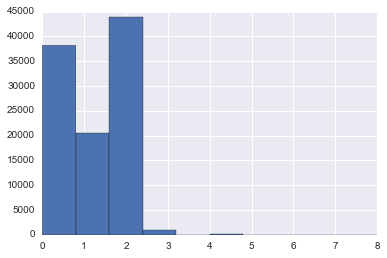

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
('COUNT', 'output urine', 'known', 'qn', 'mL', 'all')


count    103614.000000
mean          1.075608
std           0.913059
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max           8.000000
Name: (COUNT, output urine, known, qn, mL, all), dtype: float64

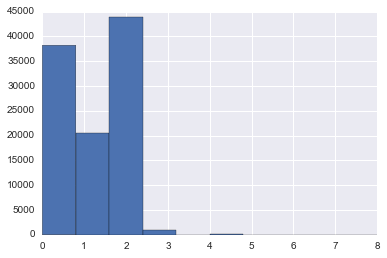

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
('STD', 'output urine', 'known', 'qn', 'mL', 'all')


count    103614.000000
mean         13.968748
std          42.411059
min           0.000000
25%           0.000000
50%           0.000000
75%          10.606602
max        1767.766953
Name: (STD, output urine, known, qn, mL, all), dtype: float64

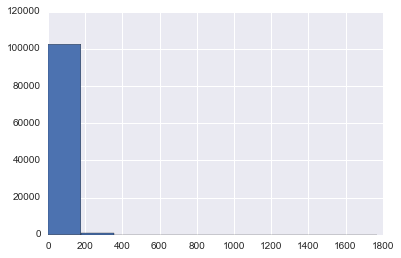

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
('MEAN', 'hemoglobin', 'known', 'qn', 'g/dL', 'all')


count    103614.000000
mean         10.393699
std           1.768262
min           0.000000
25%           9.200000
50%          10.300000
75%          11.200000
max          97.000000
Name: (MEAN, hemoglobin, known, qn, g/dL, all), dtype: float64

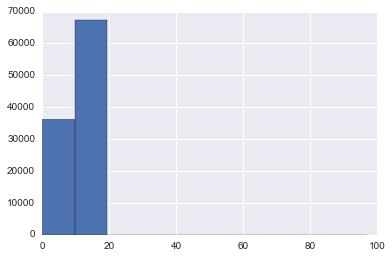

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
('LAST', 'hemoglobin', 'known', 'qn', 'g/dL', 'all')


count    103614.000000
mean         10.351729
std           1.860388
min           0.000000
25%           9.100000
50%          10.200000
75%          11.400000
max          97.000000
Name: (LAST, hemoglobin, known, qn, g/dL, all), dtype: float64

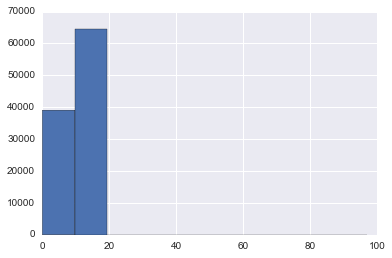

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
('LAST', 'norepinephrine', 'known', 'qn', 'mcg/kg/min', 'all')


count    103614.000000
mean          0.052286
std           0.101931
min           0.000000
25%           0.037942
50%           0.037942
75%           0.037942
max          10.000000
Name: (LAST, norepinephrine, known, qn, mcg/kg/min, all), dtype: float64

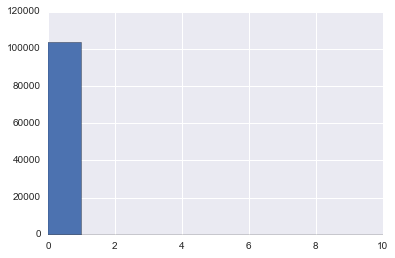

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
('COUNT', 'temperature body', 'known', 'qn', 'degF', 'all')


count    103614.000000
mean          0.753769
std           1.319150
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         120.000000
Name: (COUNT, temperature body, known, qn, degF, all), dtype: float64

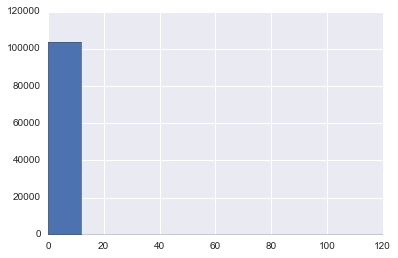

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
('MEAN', 'norepinephrine', 'known', 'qn', 'mcg/kg/min', 'all')


count    103614.000000
mean          0.057853
std           0.092927
min           0.000000
25%           0.045118
50%           0.045118
75%           0.045118
max           5.777778
Name: (MEAN, norepinephrine, known, qn, mcg/kg/min, all), dtype: float64

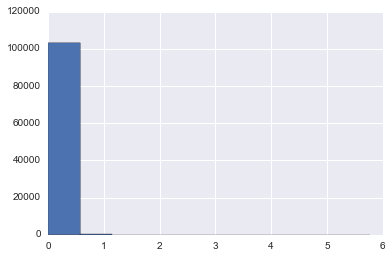

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
('COUNT', 'glasgow coma scale motor', 'known', 'ord', 'no_units', 'all')


count    103614.000000
mean          0.267145
std           0.481816
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: (COUNT, glasgow coma scale motor, known, ord, no_units, all), dtype: float64

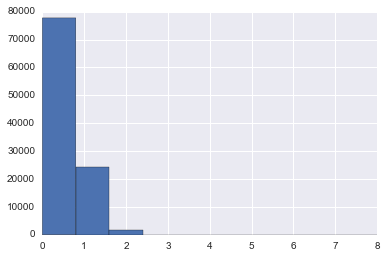

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
('COUNT', 'glasgow coma scale verbal', 'known', 'ord', 'no_units', 'all')


count    103614.000000
mean          0.268699
std           0.483543
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           8.000000
Name: (COUNT, glasgow coma scale verbal, known, ord, no_units, all), dtype: float64

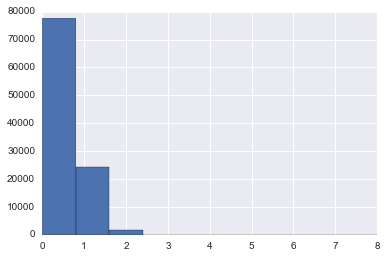

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
('COUNT', 'glasgow coma scale eye opening', 'known', 'ord', 'no_units', 'all')


count    103614.000000
mean          0.269037
std           0.483664
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           8.000000
Name: (COUNT, glasgow coma scale eye opening, known, ord, no_units, all), dtype: float64

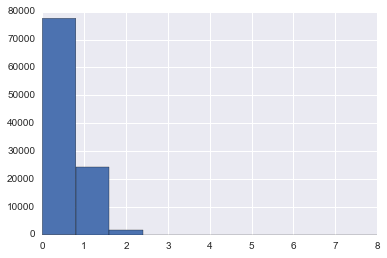

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
('COUNT', 'vasopressin', 'known', 'qn', 'units/min', 'all')


count    103614.000000
mean          0.144903
std           0.758535
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: (COUNT, vasopressin, known, qn, units/min, all), dtype: float64

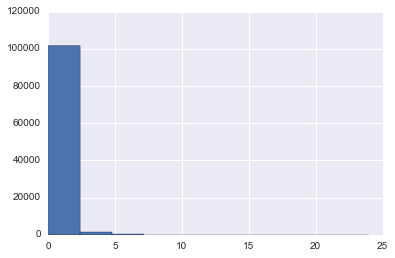

In [146]:
for col in X:
    print '@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@'
    print col
    display(X[col].describe())
    X[col].hist()
    plt.show()


In [147]:
next_lac = df_train_simple.loc[:,['LABEL']].shift(-1).dropna().iloc[:,0]

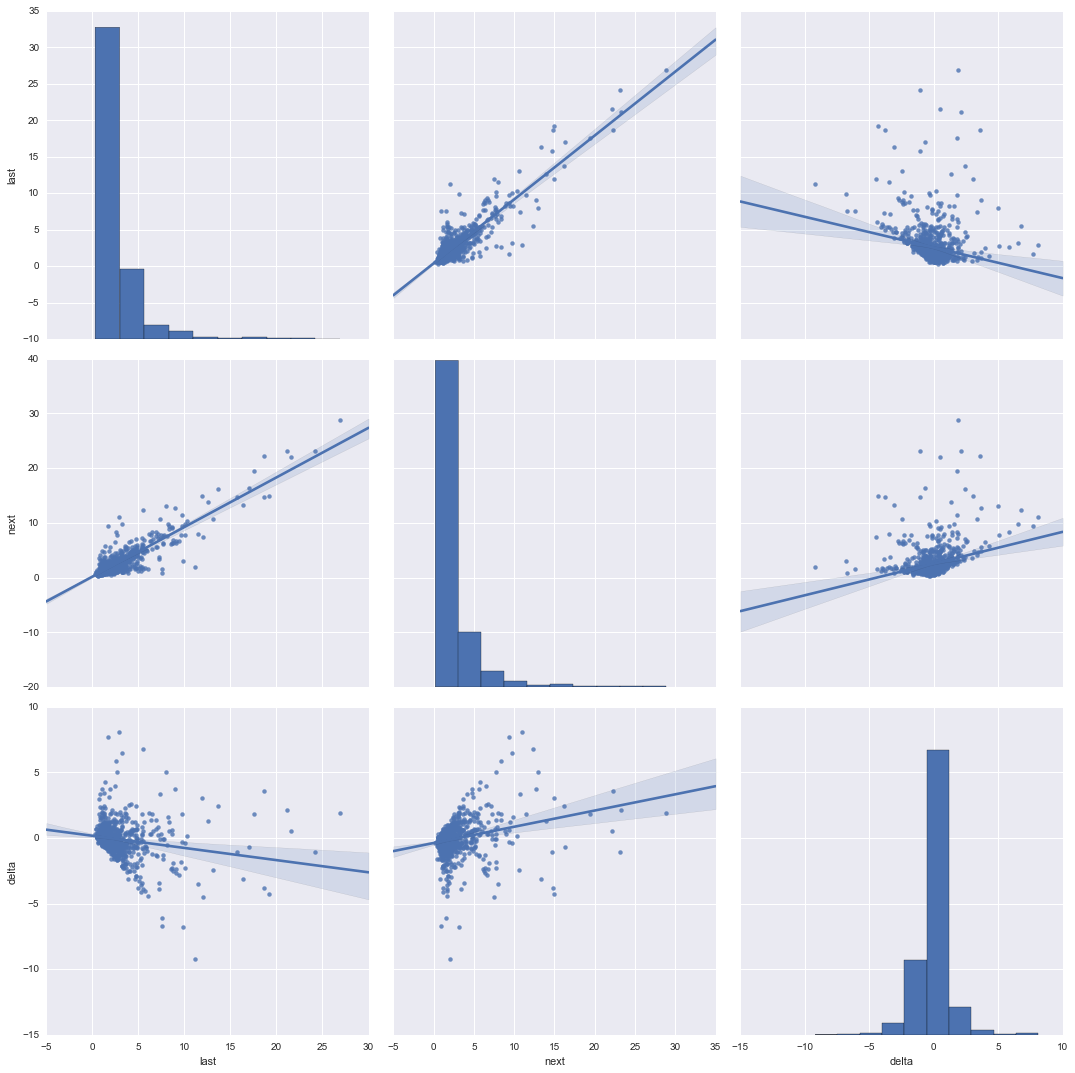

In [150]:
sns.pairplot(lac_all.sample(1000),size=5,kind="reg")

In [164]:
ft_subset = ft_to_keep[4:]
display(pd.DataFrame(ft_subset, columns = X_train.columns.names).sort_values('component'))
X = X_train.loc[:,ft_subset]
y = y_train

pipeline.fit(X,y)

feature                         component   status variable_type  \
13    LAST          blood pressure diastolic    known            qn   
10    MEAN          blood pressure diastolic    known            qn   
0     MEAN           blood pressure systolic    known            qn   
1     LAST           blood pressure systolic    known            qn   
25   COUNT    glasgow coma scale eye opening    known           ord   
23   COUNT          glasgow coma scale motor    known           ord   
24   COUNT         glasgow coma scale verbal    known           ord   
3     LAST                        heart rate    known            qn   
6     MEAN                        heart rate    known            qn   
19    LAST                        hemoglobin    known            qn   
18    MEAN                        hemoglobin    known            qn   
2    COUNT                        hemoglobin    known            qn   
14     STD                        hemoglobin    known            qn   
20    LAST                    norepinephrine    known            qn   
22    MEAN                    norepinephrine    known            qn   
11   COUNT                      output urine  unknown           nom   
9      SUM                      output urine    known            qn   
15   COUNT                      output urine  unknown           nom   
16   COUNT                      output urine    known            qn   
17     STD                      output urine    known            qn   
12   COUNT                      output urine  unknown           nom   
7     MEAN  oxygen saturation pulse oximetry    known            qn   
4     LAST  oxygen saturation pulse oximetry    known            qn   
8     LAST                  respiratory rate    known            qn   
5     MEAN                  respiratory rate    known            qn   
21   COUNT                  temperature body    known            qn   
26   COUNT                       vasopressin    known            qn   

         units          description  
13        mmHg                  all  
10        mmHg                  all  
0         mmHg                  all  
1         mmHg                  all  
25    no_units                  all  
23    no_units                  all  
24    no_units                  all  
3    beats/min                  all  
6    beats/min                  all  
19        g/dL                  all  
18        g/dL                  all  
2         g/dL                  all  
14        g/dL                  all  
20  mcg/kg/min                  all  
22  mcg/kg/min                  all  
11    no_units      3686_Voiding qs  
9           mL                  all  
15    no_units     3686(ml)_No Void  
16          mL                  all  
17          mL                  all  
12    no_units  3686(ml)_Voiding qs  
7      percent                  all  
4      percent                  all  
8     insp/min                  all  
5     insp/min                  all  
21        degF                  all  
26   units/min                  all

Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [166]:
pd.Series(lin_reg.coef_,index=ft_subset).sort_values().to_frame().astype(np.float16)

0
(LAST, hemoglobin, known, qn, g/dL, all)           -0.158447
(COUNT, output urine, known, qn, mL, all)          -0.077087
(LAST, oxygen saturation pulse oximetry, known,... -0.057892
(SUM, output urine, known, qn, mL, all)            -0.049957
(LAST, heart rate, known, qn, beats/min, all)      -0.047211
(MEAN, blood pressure diastolic, known, qn, mmH... -0.045105
(MEAN, norepinephrine, known, qn, mcg/kg/min, all) -0.037781
(LAST, blood pressure systolic, known, qn, mmHg... -0.025742
(COUNT, temperature body, known, qn, degF, all)    -0.022003
(COUNT, glasgow coma scale verbal, known, ord, ... -0.021484
(MEAN, oxygen saturation pulse oximetry, known,... -0.011589
(COUNT, glasgow coma scale eye opening, known, ... -0.006264
(MEAN, blood pressure systolic, known, qn, mmHg...  0.003986
(COUNT, output urine, unknown, nom, no_units, 3...  0.006649
(COUNT, output urine, unknown, nom, no_units, 3...  0.006649
(COUNT, output urine, unknown, nom, no_units, 3...  0.006649
(COUNT, glasgow coma scale motor, known, ord, n...  0.009048
(LAST, blood pressure diastolic, known, qn, mmH...  0.015083
(STD, output urine, known, qn, mL, all)             0.021332
(STD, hemoglobin, known, qn, g/dL, all)             0.024475
(COUNT, vasopressin, known, qn, units/min, all)     0.025925
(MEAN, respiratory rate, known, qn, insp/min, all)  0.040039
(LAST, respiratory rate, known, qn, insp/min, all)  0.046997
(MEAN, hemoglobin, known, qn, g/dL, all)            0.071655
(LAST, norepinephrine, known, qn, mcg/kg/min, all)  0.072510
(MEAN, heart rate, known, qn, beats/min, all)       0.075928
(COUNT, hemoglobin, known, qn, g/dL, all)           0.079651

In [162]:
#lets try the magnitudal of change only
ft_subset = ft_to_keep[4:]
display(pd.DataFrame(ft_subset, columns = X_train.columns.names).sort_values('component'))
X = X_train.loc[:,ft_subset]
y = np.abs(y_train)

run_crossval(pipeline,X,y)

feature                         component   status variable_type  \
13    LAST          blood pressure diastolic    known            qn   
10    MEAN          blood pressure diastolic    known            qn   
0     MEAN           blood pressure systolic    known            qn   
1     LAST           blood pressure systolic    known            qn   
25   COUNT    glasgow coma scale eye opening    known           ord   
23   COUNT          glasgow coma scale motor    known           ord   
24   COUNT         glasgow coma scale verbal    known           ord   
3     LAST                        heart rate    known            qn   
6     MEAN                        heart rate    known            qn   
19    LAST                        hemoglobin    known            qn   
18    MEAN                        hemoglobin    known            qn   
2    COUNT                        hemoglobin    known            qn   
14     STD                        hemoglobin    known            qn   
20    LAST                    norepinephrine    known            qn   
22    MEAN                    norepinephrine    known            qn   
11   COUNT                      output urine  unknown           nom   
9      SUM                      output urine    known            qn   
15   COUNT                      output urine  unknown           nom   
16   COUNT                      output urine    known            qn   
17     STD                      output urine    known            qn   
12   COUNT                      output urine  unknown           nom   
7     MEAN  oxygen saturation pulse oximetry    known            qn   
4     LAST  oxygen saturation pulse oximetry    known            qn   
8     LAST                  respiratory rate    known            qn   
5     MEAN                  respiratory rate    known            qn   
21   COUNT                  temperature body    known            qn   
26   COUNT                       vasopressin    known            qn   

         units          description  
13        mmHg                  all  
10        mmHg                  all  
0         mmHg                  all  
1         mmHg                  all  
25    no_units                  all  
23    no_units                  all  
24    no_units                  all  
3    beats/min                  all  
6    beats/min                  all  
19        g/dL                  all  
18        g/dL                  all  
2         g/dL                  all  
14        g/dL                  all  
20  mcg/kg/min                  all  
22  mcg/kg/min                  all  
11    no_units      3686_Voiding qs  
9           mL                  all  
15    no_units     3686(ml)_No Void  
16          mL                  all  
17          mL                  all  
12    no_units  3686(ml)_Voiding qs  
7      percent                  all  
4      percent                  all  
8     insp/min                  all  
5     insp/min                  all  
21        degF                  all  
26   units/min                  all

Cross Validation, K-Fold
R^2: 0.0352837618466, 0.00476129329963
RMSE: 1.08841685152, 0.0695178043988

Cross Validation, ShuffleSplit
R^2: 0.0355914023088, 0.00252844609666
RMSE: 1.09085945366, 0.029331024701


In [163]:
#what about DIRECTION only
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg_pipeline = Pipeline([
        ('scaler',StandardScaler()),
        ('log_reg',log_reg)
    ])

In [183]:
ft_subset = ft_to_keep[4:]
display(pd.DataFrame(ft_subset, columns = X_train.columns.names).sort_values('component'))
X = X_train.loc[:,ft_subset]
y = (y_train / np.abs(y_train)).fillna(0)

log_reg_pipeline.fit(X,y)
print 'Train accuracy:',log_reg_pipeline.score(X,y)

feature                         component   status variable_type  \
13    LAST          blood pressure diastolic    known            qn   
10    MEAN          blood pressure diastolic    known            qn   
0     MEAN           blood pressure systolic    known            qn   
1     LAST           blood pressure systolic    known            qn   
25   COUNT    glasgow coma scale eye opening    known           ord   
23   COUNT          glasgow coma scale motor    known           ord   
24   COUNT         glasgow coma scale verbal    known           ord   
3     LAST                        heart rate    known            qn   
6     MEAN                        heart rate    known            qn   
19    LAST                        hemoglobin    known            qn   
18    MEAN                        hemoglobin    known            qn   
2    COUNT                        hemoglobin    known            qn   
14     STD                        hemoglobin    known            qn   
20    LAST                    norepinephrine    known            qn   
22    MEAN                    norepinephrine    known            qn   
11   COUNT                      output urine  unknown           nom   
9      SUM                      output urine    known            qn   
15   COUNT                      output urine  unknown           nom   
16   COUNT                      output urine    known            qn   
17     STD                      output urine    known            qn   
12   COUNT                      output urine  unknown           nom   
7     MEAN  oxygen saturation pulse oximetry    known            qn   
4     LAST  oxygen saturation pulse oximetry    known            qn   
8     LAST                  respiratory rate    known            qn   
5     MEAN                  respiratory rate    known            qn   
21   COUNT                  temperature body    known            qn   
26   COUNT                       vasopressin    known            qn   

         units          description  
13        mmHg                  all  
10        mmHg                  all  
0         mmHg                  all  
1         mmHg                  all  
25    no_units                  all  
23    no_units                  all  
24    no_units                  all  
3    beats/min                  all  
6    beats/min                  all  
19        g/dL                  all  
18        g/dL                  all  
2         g/dL                  all  
14        g/dL                  all  
20  mcg/kg/min                  all  
22  mcg/kg/min                  all  
11    no_units      3686_Voiding qs  
9           mL                  all  
15    no_units     3686(ml)_No Void  
16          mL                  all  
17          mL                  all  
12    no_units  3686(ml)_Voiding qs  
7      percent                  all  
4      percent                  all  
8     insp/min                  all  
5     insp/min                  all  
21        degF                  all  
26   units/min                  all

Train accuracy: 0.550456502017


In [189]:
 X_train.loc[:,ft_subset].loc[:,'COUNT'].loc[:,'output urine']

status                             unknown                      \
variable_type                          nom                       
units                             no_units                       
description                3686_Voiding qs 3686(ml)_Voiding qs   
id     datetime                                                  
100007 2145-04-02 14:00:00               0                   0   
100010 2109-12-10 12:00:00               0                   0   
100012 2177-03-14 10:00:00               0                   0   
       2177-03-15 08:00:00               2                   2   
       2177-03-15 14:00:00               2                   2   
       2177-03-15 20:00:00               2                   2   
100018 2176-08-30 08:00:00               0                   0   
       2176-08-30 10:00:00               0                   0   
       2176-08-30 12:00:00               0                   0   
100020 2142-12-03 00:00:00               0                   0   
100028 2142-12-24 14:00:00               2                   2   
       2142-12-25 02:00:00               2                   2   
100034 2164-04-23 10:00:00               0                   0   
100035 2115-02-22 08:00:00               0                   0   
       2115-02-22 12:00:00               2                   2   
       2115-02-22 14:00:00               2                   2   
       2115-02-22 16:00:00               2                   2   
       2115-02-22 18:00:00               2                   2   
       2115-02-22 20:00:00               2                   2   
       2115-02-22 22:00:00               2                   2   
       2115-02-23 04:00:00               2                   2   
       2115-02-23 10:00:00               2                   2   
       2115-02-23 12:00:00               2                   2   
       2115-02-23 20:00:00               1                   1   
       2115-02-24 04:00:00               2                   2   
       2115-02-24 10:00:00               2                   2   
       2115-02-25 04:00:00               2                   2   
       2115-02-25 08:00:00               2                   2   
       2115-03-18 10:00:00               0                   0   
100036 2187-07-17 12:00:00               0                   0   
...                                    ...                 ...   
199972 2186-08-30 16:00:00               1                   1   
       2186-08-30 20:00:00               2                   2   
       2186-08-31 00:00:00               2                   2   
       2186-08-31 04:00:00               2                   2   
       2186-09-01 18:00:00               2                   2   
199976 2182-02-04 14:00:00               2                   2   
       2182-02-05 12:00:00               2                   2   
       2182-02-08 04:00:00               2                   2   
       2182-02-10 02:00:00               1                   1   
       2182-02-10 22:00:00               1                   1   
       2182-02-14 04:00:00               2                   2   
       2182-02-14 10:00:00               1                   1   
       2182-02-16 02:00:00               2                   2   
       2182-02-19 02:00:00               2                   2   
       2182-02-20 02:00:00               1                   1   
       2182-02-21 04:00:00               2                   2   
199979 2182-02-06 14:00:00               0                   0   
199981 2110-09-24 20:00:00               1                   1   
       2110-09-25 06:00:00               1                   1   
199988 2169-02-07 00:00:00               0                   0   
       2169-02-07 10:00:00               2                   2   
       2169-02-07 16:00:00               2                   2   
       2169-02-07 22:00:00               2                   2   
       2169-02-10 04:00:00               0                   0   
199994 2188-07-08 02:00:00              

In [191]:
df_train_simple.loc[:,'COUNT'].loc[:,'output urine']

status                     known          unknown                      \
variable_type                 qn              nom                       
units                         mL         no_units                       
description                  all 3686(ml)_No Void 3686(ml)_Voiding qs   
id     datetime                                                         
100001 2117-09-11 10:00:00     0                0                   0   
       2117-09-11 12:00:00     0                0                   0   
       2117-09-11 14:00:00     1                1                   1   
       2117-09-11 16:00:00     0                0                   0   
       2117-09-11 18:00:00     0                0                   0   
       2117-09-11 20:00:00     1                1                   1   
       2117-09-11 22:00:00     0                0                   0   
       2117-09-12 00:00:00     1                1                   1   
       2117-09-12 02:00:00     0                0                   0   
       2117-09-12 04:00:00     1                1                   1   
       2117-09-12 06:00:00     1                1                   1   
       2117-09-12 08:00:00     2                2                   2   
       2117-09-12 10:00:00     1                1                   1   
       2117-09-12 12:00:00     1                1                   1   
       2117-09-12 14:00:00     1                1                   1   
       2117-09-12 16:00:00     1                1                   1   
       2117-09-12 18:00:00     0                0                   0   
       2117-09-12 20:00:00     0                0                   0   
       2117-09-12 22:00:00     0                0                   0   
       2117-09-13 00:00:00     1                1                   1   
       2117-09-13 02:00:00     0                0                   0   
       2117-09-13 04:00:00     1                1                   1   
       2117-09-13 06:00:00     0                0                   0   
       2117-09-13 08:00:00     0                0                   0   
       2117-09-13 10:00:00     2                2                   2   
       2117-09-13 12:00:00     0                0                   0   
       2117-09-13 14:00:00     0                0                   0   
       2117-09-13 16:00:00     0                0                   0   
       2117-09-13 18:00:00     1                1                   1   
       2117-09-13 20:00:00     0                0                   0   
...                          ...              ...                 ...   
199999 2136-04-08 02:00:00     1                1                   1   
       2136-04-08 04:00:00     0                0                   0   
       2136-04-08 06:00:00     1                1                   1   
       2136-04-08 08:00:00     0                0                   0   
       2136-04-08 10:00:00     0                0                   0   
       2136-04-08 12:00:00     1                1                   1   
       2136-04-08 14:00:00     1                1                   1   
       2136-04-08 16:00:00     0                0                   0   
       2136-04-08 18:00:00     1                1                   1   
       2136-04-08 20:00:00     0                0                   0   
       2136-04-08 22:00:00     1                1                   1   
       2136-04-09 00:00:00     1                1                   1   
       2136-04-09 02:00:00     1                1                   1   
       2136-04-09 04:00:00     0                0                   0   
       2136-04-09 06:00:00     1                1                   1   
       2136-04-09 08:00:00     1                1                   1   
       2136-04-09 10:00:00     1                1                   1   
       2136-04-09 12:00:00     0                0                   0   
       2136-04-09 14:00:00     0                0         

In [197]:
df_uop = utils.read_and_reconstruct('data/mimic_extract.h5','output urine')

In [205]:
df_uop_nom = df_uop.loc[:,idx[:,:,'nom',:,:]]

df_uop_nom.loc[df_uop_nom.sum(axis=1) > 0].iloc[:,:3].sort_index()

component                      output urine                                 
status                              unknown                                 
variable_type                           nom                                 
units                              no_units                                 
description                3686(ml)_No Void 3686(ml)_Voiding qs 3686_No Void
id     datetime                                                             
100023 2130-05-28 09:30:00                1                   0            0
100025 2191-07-13 13:00:00                0                   1            0
       2191-07-13 16:00:00                0                   1            0
       2191-07-13 21:30:00                0                   1            0
       2191-07-14 00:30:00                0                   1            0
       2191-07-14 03:00:00                0                   1            0
       2191-07-14 06:00:00                0                   1            0
       2191-07-14 09:00:00                0                   1            0
       2191-07-14 12:00:00                0                   1            0
       2191-07-14 15:00:00                0                   1            0
       2191-07-14 18:00:00                0                   1            0
       2191-07-14 20:00:00                0                   1            0
       2191-07-15 00:00:00                0                   1            0
100029 2185-04-17 16:00:00                0                   1            0
       2185-04-17 20:00:00                0                   1            0
       2185-04-18 00:00:00                0                   1            0
       2185-04-18 04:00:00                0                   1            0
       2185-04-18 08:00:00                0                   1            0
       2185-04-18 12:00:00                0                   1            0
       2185-04-18 16:00:00                0                   1            0
       2185-04-18 20:00:00                0                   1            0
       2185-04-19 00:00:00                0                   1            0
       2185-04-19 04:00:00                0                   1            0
       2185-04-19 08:00:00                0                   1            0
       2185-04-19 12:00:00                0                   1            0
       2185-04-19 16:45:00                0                   1            0
       2185-04-19 20:00:00                0                   1            0
       2185-04-20 00:00:00                0                   1            0
       2185-04-20 04:00:00                0                   1            0
       2185-04-20 08:00:00                0                   1            0
...                                     ...                 ...          ...
199918 2111-05-23 16:30:00                0                   1            0
       2111-05-23 20:30:00                0                   1            0
       2111-05-24 00:30:00                0                   1            0
       2111-05-24 04:30:00                0                   1            0
       2111-05-24 07:30:00                0                   1            0
       2111-05-24 11:30:00                0                   1            0
       2111-05-24 16:00:00                0                   1            0
       2111-05-24 20:30:00                0                   1            0
       2111-05-25 00:30:00                0                   1            0
       2111-05-25 04:30:00                0                   1            0
       2111-05-25 08:30:00                0                   1            0
       2111-05-25 12:30:00                0                   1            0
       2111-05-25 16:30:00                0                   1            0
       2111-05-25 20:30:00                0                   1            0
       2111-05-26 00:30:00                0                   1          

In [218]:
df_head = df_uop.iloc[:1000,:5]

In [219]:
df_head.iloc[0:5,0] = 25

In [220]:
df_head

component                  output urine                                      
status                            known                                      
variable_type                        qn                                      
units                                mL                                      
description                      226559  226560 40055(ml) 40069(ml) 40405(ml)
id     datetime                                                              
100001 2117-09-11 13:49:00         25.0   300.0       NaN       NaN       NaN
       2117-09-11 18:34:00         25.0   400.0       NaN       NaN       NaN
       2117-09-11 22:00:00         25.0   200.0       NaN       NaN       NaN
       2117-09-12 02:00:00         25.0   500.0       NaN       NaN       NaN
       2117-09-12 04:00:00         25.0   650.0       NaN       NaN       NaN
       2117-09-12 06:00:00          NaN   450.0       NaN       NaN       NaN
       2117-09-12 07:00:00          NaN   600.0       NaN       NaN       NaN
       2117-09-12 09:40:00          NaN   400.0       NaN       NaN       NaN
       2117-09-12 11:11:00          NaN   400.0       NaN       NaN       NaN
       2117-09-12 13:12:00          NaN   400.0       NaN       NaN       NaN
       2117-09-12 14:48:00          NaN   400.0       NaN       NaN       NaN
       2117-09-12 22:00:00          NaN   500.0       NaN       NaN       NaN
       2117-09-13 02:00:00          NaN   200.0       NaN       NaN       NaN
       2117-09-13 08:00:00          NaN   500.0       NaN       NaN       NaN
       2117-09-13 09:00:00          NaN   500.0       NaN       NaN       NaN
       2117-09-13 16:09:00          NaN   800.0       NaN       NaN       NaN
       2117-09-14 04:08:00          NaN   400.0       NaN       NaN       NaN
       2117-09-15 00:07:00          NaN  1200.0       NaN       NaN       NaN
100003 2150-04-17 19:00:00        150.0     NaN       NaN       NaN       NaN
       2150-04-17 20:00:00        200.0     NaN       NaN       NaN       NaN
       2150-04-17 21:00:00         80.0     NaN       NaN       NaN       NaN
       2150-04-17 22:00:00         50.0     NaN       NaN       NaN       NaN
       2150-04-17 23:00:00         60.0     NaN       NaN       NaN       NaN
       2150-04-18 00:00:00        100.0     NaN       NaN       NaN       NaN
       2150-04-18 01:00:00        200.0     NaN       NaN       NaN       NaN
       2150-04-18 02:00:00        140.0     NaN       NaN       NaN       NaN
       2150-04-18 04:00:00        180.0     NaN       NaN       NaN       NaN
       2150-04-18 06:00:00        200.0     NaN       NaN       NaN       NaN
       2150-04-18 08:00:00        360.0     NaN       NaN       NaN       NaN
       2150-04-18 09:00:00        160.0     NaN       NaN       NaN       NaN
...                                 ...     ...       ...       ...       ...
100031 2140-11-14 04:00:00          NaN     NaN      30.0       NaN       NaN
       2140-11-14 05:00:00          NaN     NaN      40.0       NaN       NaN
       2140-11-14 06:00:00          NaN     NaN      40.0       NaN       NaN
       2140-11-14 07:00:00          NaN     NaN      33.0       NaN       NaN
       2140-11-14 08:00:00          NaN     NaN      55.0       NaN       NaN
       2140-11-14 09:00:00          NaN     NaN     400.0       NaN       NaN
       2140-11-14 10:00:00          NaN     NaN     300.0       NaN       NaN
       2140-11-14 11:00:00          NaN     NaN     160.0       NaN       NaN
       2140-11-14 12:00:00          NaN     NaN      80.0       NaN       NaN
       2140-11-14 13:00:00          NaN     NaN      35.0       NaN       NaN
       2140-11-14 14:00:00          NaN     NaN      35.0       NaN       NaN
       2140-11-14 15:00:00          NaN     NaN      65.0       NaN       NaN
       2140-11-14 16:00:00          NaN     NaN      35.0       NaN       NaN
       2140-11-14 17:00:00          NaN     NaN     320.0       NaN       NaN
       2140-11-14 18:0

In [221]:
resampled = df_head.groupby(level='id').resample(rule='12H',level='datetime',label='right')

In [223]:
resampled.count()

component                  output urine                                     
status                            known                                     
variable_type                        qn                                     
units                                mL                                     
description                      226559 226560 40055(ml) 40069(ml) 40405(ml)
id     datetime                                                             
100001 2117-09-12 00:00:00            3      3         0         0         0
       2117-09-12 12:00:00            2      6         0         0         0
       2117-09-13 00:00:00            0      3         0         0         0
       2117-09-13 12:00:00            0      3         0         0         0
       2117-09-14 00:00:00            0      1         0         0         0
       2117-09-14 12:00:00            0      1         0         0         0
       2117-09-15 00:00:00            0      0         0         0         0
       2117-09-15 12:00:00            0      1         0         0         0
100003 2150-04-18 00:00:00            5      0         0         0         0
       2150-04-18 12:00:00            8      1         0         0         0
       2150-04-19 00:00:00            0      4         0         0         0
       2150-04-19 12:00:00            0      4         0         0         0
100006 2108-04-07 00:00:00            0      0         0         2         0
       2108-04-07 12:00:00            0      0         0         3         0
       2108-04-08 00:00:00            0      0         0         5         0
       2108-04-08 12:00:00            0      0         0         4         0
       2108-04-09 00:00:00            0      0         4         8         0
       2108-04-09 12:00:00            0      0         9         0         0
       2108-04-10 00:00:00            0      0         3         0         0
       2108-04-10 12:00:00            0      0         2         1         0
       2108-04-11 00:00:00            0      0         0         4         0
       2108-04-11 12:00:00            0      0         0         3         0
100007 2145-04-01 00:00:00            0      0        11         0         0
       2145-04-01 12:00:00            0      0        12         0         0
       2145-04-02 00:00:00            0      0         6         0         0
       2145-04-02 12:00:00            0      0         0         0         0
       2145-04-03 00:00:00            0      0         7         0         0
       2145-04-03 12:00:00            0      0         6         0         0
       2145-04-04 00:00:00            0      0         0         1         0
       2145-04-04 12:00:00            0      0         0         2         0
...                                 ...    ...       ...       ...       ...
100029 2185-04-25 12:00:00            0      0         0         0         0
       2185-04-26 00:00:00            0      0         0         0         0
       2185-04-26 12:00:00            0      0         0         0         0
       2185-04-27 00:00:00            0      0         0         0         0
       2185-04-27 12:00:00            0      0         0         0         0
       2185-04-28 00:00:00            0      0         0         0         0
       2185-04-28 12:00:00            0      0         0         0         0
       2185-04-29 00:00:00            0      0         0         0         0
       2185-04-29 12:00:00            0      0         0         0         0
       2185-04-30 00:00:00            0      0         0         0         0
       2185-04-30 12:00:00            0      0         0         0         0
       2185-05-01 00:00:00            0      0         0         0         0
       2185-05-01 12:00:00            0      0         0         0         0
       2185-05-02 00:00:00            0      0         0         0         0
       2185-05-02 12:00:00            0      0         0         0       

In [230]:
df_train_simple

feature                                       MEAN            \
component                  blood pressure systolic             
status                                       known   unknown   
variable_type                                   qn        qn   
units                                         mmHg    cc/min   
description                                    all       all   
id     datetime                                                
100001 2117-09-11 10:00:00              121.931614  69.78821   
       2117-09-11 12:00:00              121.931614  69.78821   
       2117-09-11 14:00:00              192.000000  69.78821   
       2117-09-11 16:00:00              130.500000  69.78821   
       2117-09-11 18:00:00              157.200000  69.78821   
       2117-09-11 20:00:00              174.500000  69.78821   
       2117-09-11 22:00:00              187.500000  69.78821   
       2117-09-12 00:00:00              181.250000  69.78821   
       2117-09-12 02:00:00              191.500000  69.78821   
       2117-09-12 04:00:00              192.333333  69.78821   
       2117-09-12 06:00:00              193.000000  69.78821   
       2117-09-12 08:00:00              191.400000  69.78821   
       2117-09-12 10:00:00              150.500000  69.78821   
       2117-09-12 12:00:00              177.500000  69.78821   
       2117-09-12 14:00:00              199.750000  69.78821   
       2117-09-12 16:00:00              207.500000  69.78821   
       2117-09-12 18:00:00              144.666667  69.78821   
       2117-09-12 20:00:00              152.750000  69.78821   
       2117-09-12 22:00:00              154.666667  69.78821   
       2117-09-13 00:00:00              152.666667  69.78821   
       2117-09-13 02:00:00              170.000000  69.78821   
       2117-09-13 04:00:00              182.000000  69.78821   
       2117-09-13 06:00:00              177.500000  69.78821   
       2117-09-13 08:00:00              176.000000  69.78821   
       2117-09-13 10:00:00              170.166667  69.78821   
       2117-09-13 12:00:00              184.500000  69.78821   
       2117-09-13 14:00:00              197.000000  69.78821   
       2117-09-13 16:00:00              197.500000  69.78821   
       2117-09-13 18:00:00              170.333333  69.78821   
       2117-09-13 20:00:00              167.000000  69.78821   
...                                            ...       ...   
199999 2136-04-08 02:00:00              144.333333  69.78821   
       2136-04-08 04:00:00              140.333333  69.78821   
       2136-04-08 06:00:00              147.000000  69.78821   
       2136-04-08 08:00:00              106.500000  69.78821   
       2136-04-08 10:00:00              148.666667  69.78821   
       2136-04-08 12:00:00              139.500000  69.78821   
       2136-04-08 14:00:00              138.500000  69.78821   
       2136-04-08 16:00:00              141.000000  69.78821   
       2136-04-08 18:00:00              143.000000  69.78821   
       2136-04-08 20:00:00              133.500000  69.78821   
       2136-04-08 22:00:00              135.500000  69.78821   
       2136-04-09 00:00:00              145.000000  69.78821   
       2136-04-09 02:00:00              148.333333  69.78821   
       2136-04-09 04:00:00              146.400000  69.78821   
       2136-04-09 06:00:00              142.500000  69.78821   
       2136-04-09 08:00:00              143.000000  69.78821   
       2136-04-09 10:00:00              123.500000  69.78821   
       2136-04-09 12:00:00              119.000000  69.78821   
       2136-04-09 14:00:00              137.500000  69.78821   
       2136-04-09 16:00:00              128.500000  69.78821   
       2136-04-09 18:00:00              141.500000  69.78821   
       2136-04-09 20:00:00              140.000000  69.78821   
       2136-04-09 22:00:00              137.000000  69.78821   
       2136-04-10 00:00:00              120.500000  69.78821   
       2136-04-10 02:00:00      